Đề tài 9. Dựa vào tập dữ liệu ảnh chữ số viết tay (đã được giáo viên cung cấp trong phần thực hành) đặt trong các thư mục
theo cấu trúc tương tự như trong bài thực hành đã có.
1) Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc
2D.
2) Thực hiện phân cụm (clustering) dữ liệu gốc bằng 01 thuật toán phân cụm. Hiển thị trực quan và đánh dấu các cụm.
3) Xây dựng chương trình sử dụng mô hình Multinomial Logistic Regression (Softmax) để phân loại các hình ảnh, huấn
luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.
4) Xây dựng chương trình sử dụng mô hình CNN để phân loại các hình ảnh. Kiến trúc cụ thể như sau: Mạng gồm ít
nhất 03 tầng tích chập hỗn hợp Convolution + Activation ReLU + Max Pooling, 02 tầng fully connected với số units
phù hợp và tầng quyết định cuối cùng sử dụng softmax. Huấn luyện mô hình bằng tập dữ liệu training sau đó chạy
kiểm tra với dữ liệu trong tập validation.
5) Xây dựng chương trình sử dụng mô hình Multi-Classes Support Vector Machine để phân loại các hình ảnh, huấn
luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.
6) So sánh độ chính xác (sử dụng accuracy, confusion matrix, recall và precision) của các mô hình trong ý 3) 4) và ý 5).

In [137]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'C:/Users/Admin/Desktop/ML/week4/'

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [2]:
# Xây dựng phương thức đọc dữ liệu từ tệp gzip, giải nén và đưa về định dạng là một dãy ảnh (một dãy ma trận nguyên)

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [3]:
# Xây dựng phương thức đọc dữ liệu từ tệp gzip, giải nén và đưa về định dạng là một dãy ảnh (một dãy ma trận nguyên)

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size * image_size)
    
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    # images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [138]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)

test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4328\600803793.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(60000, 784) (60000,)
(10000, 784) (10000,)


## 1) Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc 2D.

In [5]:
def get_image(image):
    return image.reshape(28, 28)

8 4


<Figure size 640x480 with 0 Axes>

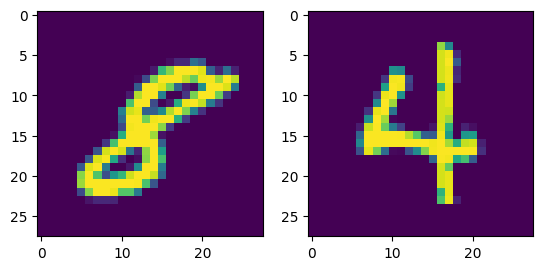

In [6]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I havestacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

#### 2D

In [28]:
from sklearn.decomposition import PCA as sklearnPCA

X, Y = get_mnist_data(train_images_path, train_labels_path, 10000, shuffle=True)

X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2)
y_sklearn = pca.fit_transform(X_norm)

pca.explained_variance_ratio_

C:\Users\Admin\AppData\Local\Temp\ipykernel_22920\600803793.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


array([0.09646282, 0.07141203], dtype=float32)

In [8]:
import pandas as pd

transformed = pd.DataFrame(y_sklearn)
transformed.head(10)

0         1
0  3.265799 -0.598569
1 -3.413761 -1.097337
2 -1.214946  2.883650
3  1.294834  2.227542
4  0.026791  3.397779
5 -3.651810 -0.827972
6 -0.009405  3.926519
7  0.432728 -2.595908
8  3.814128  0.524644
9 -0.468985 -0.234087

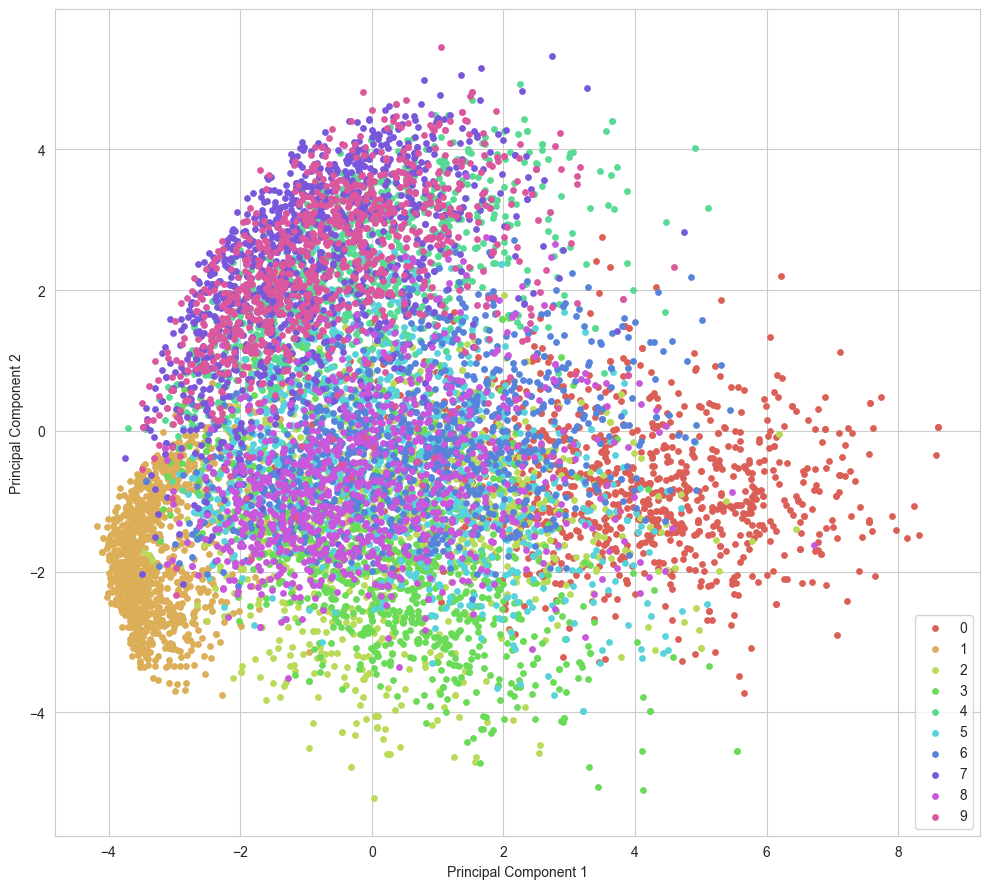

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#husl
plt.figure(figsize=(10, 9))
with sns.axes_style("whitegrid"): 
    for lab, col in zip(range(10), sns.color_palette("hls", 10)):
        plt.scatter(transformed[Y == lab][0], transformed[Y == lab][1], label=lab, c=[col],s=15 )
        # plt.axes(projection ='3d').scatter(transformed[Y == lab][0], transformed[Y == lab][1], transformed[Y == lab][2], label=lab, c=[col],s=15 )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # plt.ylabel('Principal Component 3')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


#### 3D

In [9]:
pca_3D = sklearnPCA(n_components=3)
y_sklearn_3D = pca_3D.fit_transform(X_norm)

pca_3D.explained_variance_ratio_

array([0.0961786 , 0.07222922, 0.06247143], dtype=float32)

In [10]:
import pandas as pd

transformed_3D = pd.DataFrame(y_sklearn_3D)
transformed_3D.head(10)

0         1         2
0  3.265784 -0.598532 -0.603926
1 -3.413752 -1.097387 -0.485704
2 -1.214942  2.883580 -0.507642
3  1.294845  2.227520  4.200684
4  0.026791  3.397780 -0.647167
5 -3.651803 -0.828022 -0.521880
6 -0.009402  3.926454 -0.092411
7  0.432729 -2.595888 -3.288575
8  3.814132  0.524618  2.761413
9 -0.468993 -0.234037  1.513490

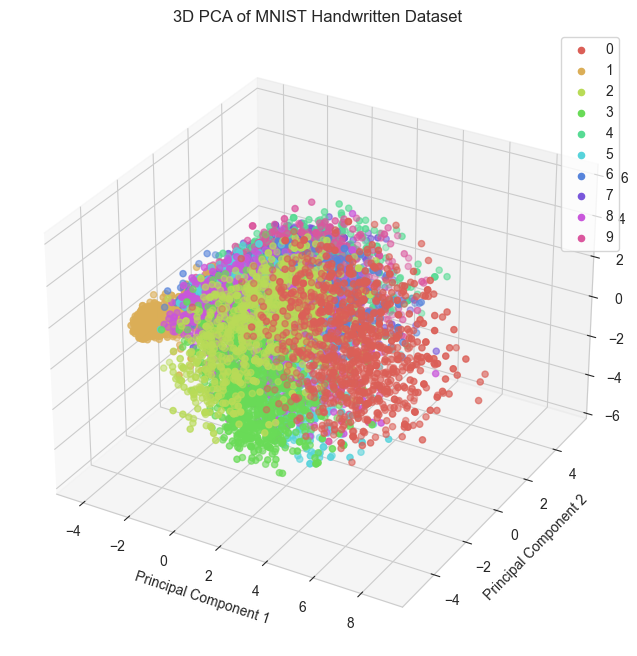

In [25]:
with sns.axes_style("whitegrid"):
    
    fig = plt.figure(figsize=(10, 8))
    
    ax = fig.add_subplot(111, projection='3d')
    
    for lab, col in zip(range(10), sns.color_palette("hls", 10)):
        ax.scatter(transformed_3D[Y==lab][0], transformed_3D[Y==lab][1], transformed_3D[Y==lab][2], label=str(lab), c=[col])
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA of MNIST Handwritten Dataset')
    
    ax.legend()
    plt.show()

pip install tenacity plotly

In [13]:
type(Y)

numpy.ndarray

In [26]:
import plotly.graph_objs as go
Scene = dict(xaxis = dict(title  = 'Principal Component 1 -->'),yaxis = dict(title  = 'Principal Component 2--->'),zaxis = dict(title  = 'Principal Component 3-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = Y
trace = go.Scatter3d(x=y_sklearn_3D[:, 0], y=y_sklearn_3D[:, 1], z=y_sklearn_3D[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))

# trace = go.Scatter3d(x=transformed_3D[0], y=transformed_3D[1], z=transformed_3D[2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))

layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [15]:
# import plotly.graph_objs as go


# labels=Y
# trace = go.Scatter3d(
#     x=transformed_3D[0],
#     y=transformed_3D[1],
#     z=transformed_3D[2],
#     mode='markers',
#     marker=dict(color=labels, size=10, line=dict(color='black', width=10))
# )

# # scene
# scene = dict(
#     xaxis=dict(title='Principal Component 1'),
#     yaxis=dict(title='Principal Component 2'),
#     zaxis=dict(title='Principal Component 3')
# )

# layout = go.Layout(
#     margin=dict(l=0, r=0),
#     scene=scene,
#     height=800,
#     width=800
# )

# data = [trace]
# fig = go.Figure(data=data, layout=layout)
# fig.show()


# traces = []
# for lab, col in zip(range(10), sns.color_palette("hls", 10)):
#     trace = go.Scatter3d(
#         x=transformed_3D[Y==lab][0],
#         y=transformed_3D[Y==lab][1],
#         z=transformed_3D[Y==lab][2],
#         mode='markers',
#         marker=dict(color=col, size=5),
#         name=str(lab)
#     )
#     traces.append(trace)

# # Define layout
# layout = go.Layout(
#     margin=dict(l=0, r=0),
#     scene=dict(
#         xaxis=dict(title='Principal Component 1'),
#         yaxis=dict(title='Principal Component 2'),
#         zaxis=dict(title='Principal Component 3')
#     ),
#     legend=dict(
#         title='Digit',
#         font=dict(size=16),
#         bgcolor='rgba(255, 255, 255, 0.5)',
#         bordercolor='rgba(0, 0, 0, 0.5)',
#         borderwidth=2
#     ),
#     height=800,
#     width=800
# )

# # Create figure
# fig = go.Figure(data=traces, layout=layout)

# # Show figure
# fig.show()

## 2) Thực hiện phân cụm (clustering) dữ liệu gốc bằng 01 thuật toán phân cụm. Hiển thị trực quan và đánh dấu các cụm.

In [11]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

In [12]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    colors = sns.color_palette("hls", n_colors=K) 

    plt.figure(figsize=(10, 8))  
    
    for k in range(K):
        Xk = X[label == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1],lw=0, s=40, color=colors[k], label=f'Cluster {k}')
        
        # # Circle around cluster
        # circle = plt.Circle((np.mean(Xk[:, 0]), np.mean(Xk[:, 1])), max(np.std(Xk[:, 0]), np.std(Xk[:, 1])), color=colors[k], fill=False)
        # plt.gca().add_artist(circle)

        # Number clusters
        xtext, ytext = np.median(X[label == k, :], axis=0)
        plt.text(xtext, ytext, str(k), fontsize=12, color='black', ha='center', va='center')
        
    # plt.title(f'Number of Clusters: {K}')
    plt.axis('equal')
    plt.legend()
    plt.show()

# def kmeans_display(X, label):
#     K = np.amax(label) + 1
#     colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown'] 
#     markers = ['^', 'o', 's', 'x', 'd', '+', '*', 'p', 'h', '8']  

#     plt.figure(figsize=(10, 9))
#     for k in range(K):
#         Xk = X[label == k, :]
#         plt.plot(Xk[:, 0], Xk[:, 1], color=colors[k], marker=markers[k], markersize=4, alpha=0.8, linestyle='None', label=f'Cluster {k}')
    
#     plt.axis('equal')
#     plt.legend(loc='lower right')
#     plt.show()


In [13]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [14]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [15]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [16]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [17]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break

        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

#### 2D

In [23]:
K = 10
(centers, labels, it) = kmeans(y_sklearn, K)

print('Centers found by our algorithm:')
print(centers[-1])

Centers found by our algorithm:
[[ 1.80458772 -2.12211442]
 [ 2.64114404 -0.19505182]
 [-0.53063005 -1.8449285 ]
 [-2.18199229 -0.34397042]
 [ 0.38064712 -0.04105907]
 [ 5.24445438 -1.16416502]
 [-0.31563199  3.12934208]
 [-3.35194612 -2.1163094 ]
 [ 1.61724484  2.76673603]
 [-1.54668891  1.6916573 ]]


In [27]:
len(labels[-1])

10000

In [34]:
def contingency_matrix(true_labels, pred_labels):
    """
    Computes the contingency matrix for true and predicted cluster labels.

    Parameters:
    true_labels (array-like): True cluster labels.
    pred_labels (array-like): Predicted cluster labels.

    Returns:
    contingency (2D array): Contingency matrix.
    """
    n_samples = len(true_labels)
    contingency = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            if true_labels[i] == true_labels[j] and pred_labels[i] == pred_labels[j]:
                contingency[i, j] = 1
            elif true_labels[i] != true_labels[j] and pred_labels[i] != pred_labels[j]:
                contingency[i, j] = 1
    return contingency

def adjusted_rand_index(true_labels, pred_labels):
    """
    Computes the Adjusted Rand Index (ARI) for true and predicted cluster labels.

    Parameters:
    true_labels (array-like): True cluster labels.
    pred_labels (array-like): Predicted cluster labels.

    Returns:
    ari (float): Adjusted Rand Index.
    """
    contingency = contingency_matrix(true_labels, pred_labels)
    a = np.sum(contingency ** 2) - np.sum(contingency) ** 2 / (2 * len(true_labels))
    b = np.sum(np.sum(contingency, axis=0) ** 2) - np.sum(contingency) ** 2 / (2 * len(true_labels))
    c = np.sum(np.sum(contingency, axis=1) ** 2) - np.sum(contingency) ** 2 / (2 * len(true_labels))
    d = (np.sum(contingency) ** 2 - np.sum(contingency ** 2)) / (2 * len(true_labels))
    
    numerator = a - (b * c) / (2 * len(true_labels))
    denominator = 0.5 * (b + c) - (b * c) / (2 * len(true_labels))
    
    ari = numerator / denominator
    
    return ari

In [24]:
from sklearn.metrics import adjusted_rand_score

score_2d = adjusted_rand_score(Y, labels[-1])
# score_2d = adjusted_rand_index(Y, labels[-1])
score_2d

0.2077292400053596

In [31]:
def contingency_matrix(labels_true, labels_pred):
    n_samples = labels_true.shape[0]
    n_clusters = np.max(labels_pred) + 1
    contingency = np.zeros((n_clusters, np.max(labels_true) + 1), dtype=np.int64)
    for i in range(n_samples):
        contingency[labels_pred[i], labels_true[i]] += 1
    return contingency

def adjusted_rand_index(labels_true, labels_pred):
    contingency = contingency_matrix(labels_true, labels_pred)
    n_samples = len(labels_true)
    a = np.sum(contingency ** 2, axis=1)
    b = np.sum(contingency ** 2, axis=0)
    c = np.sum(contingency) ** 2
    d = np.sum(a * b) / c
    e = (np.sum(a) + np.sum(b)) / 2
    f = (np.sum(a) * np.sum(b)) / c
    return (d - e) / (f - e)

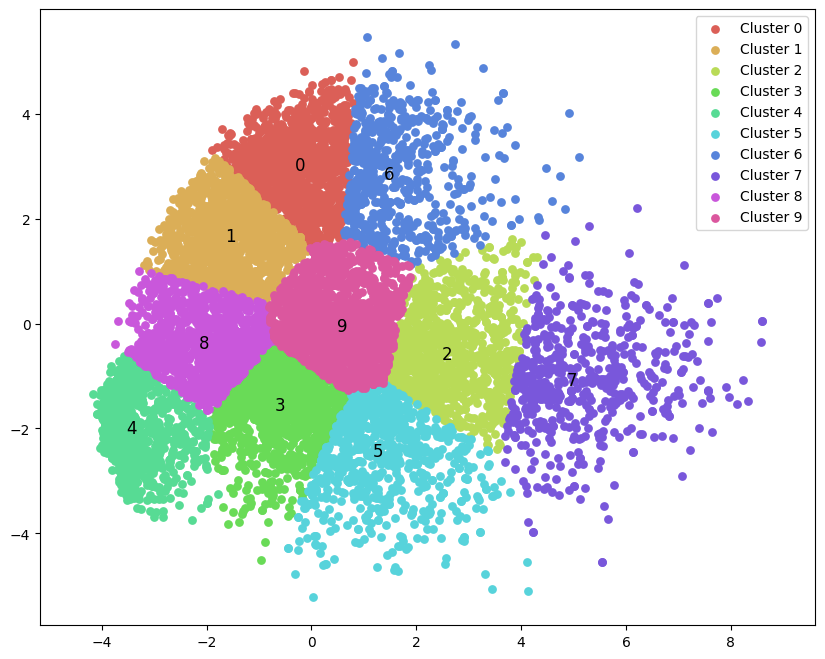

In [21]:
# Hiển thị kết quả phân cụm
kmeans_display(y_sklearn, labels[-1])

##### for searching the ideal cluster number

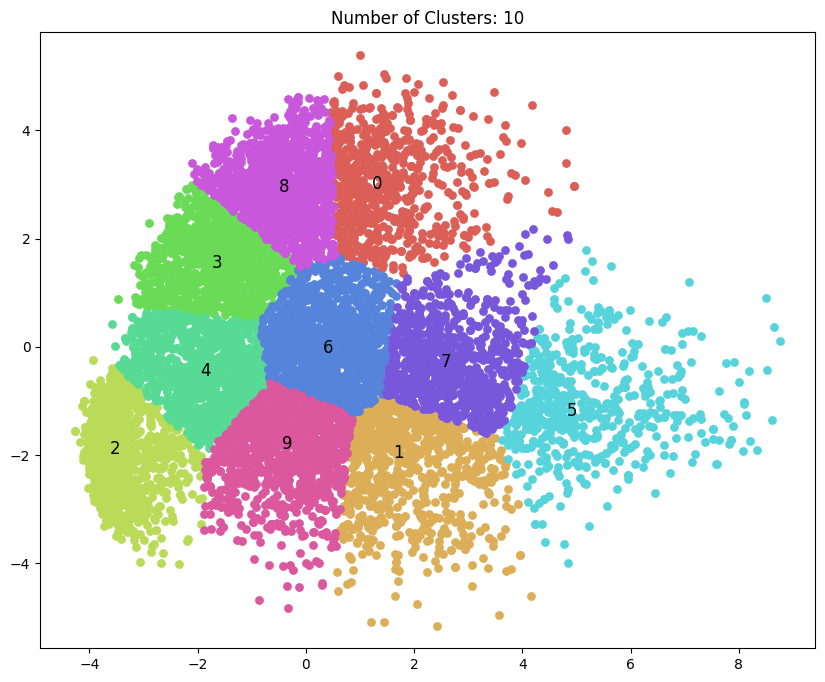

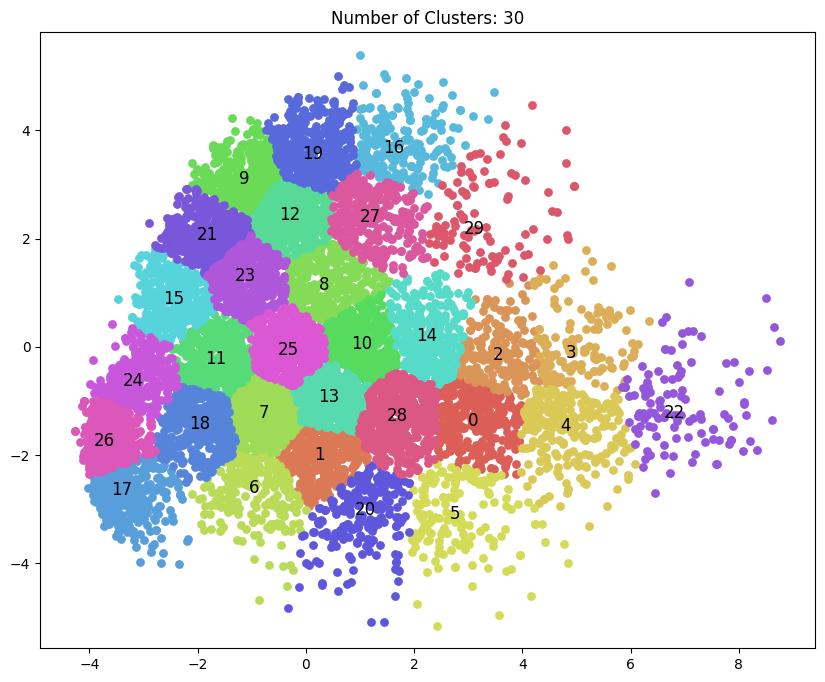

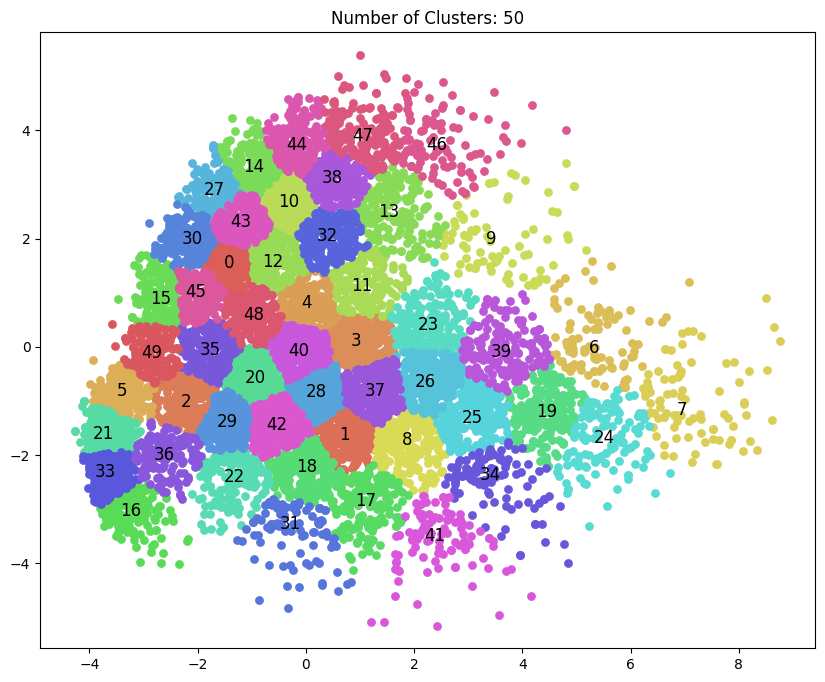

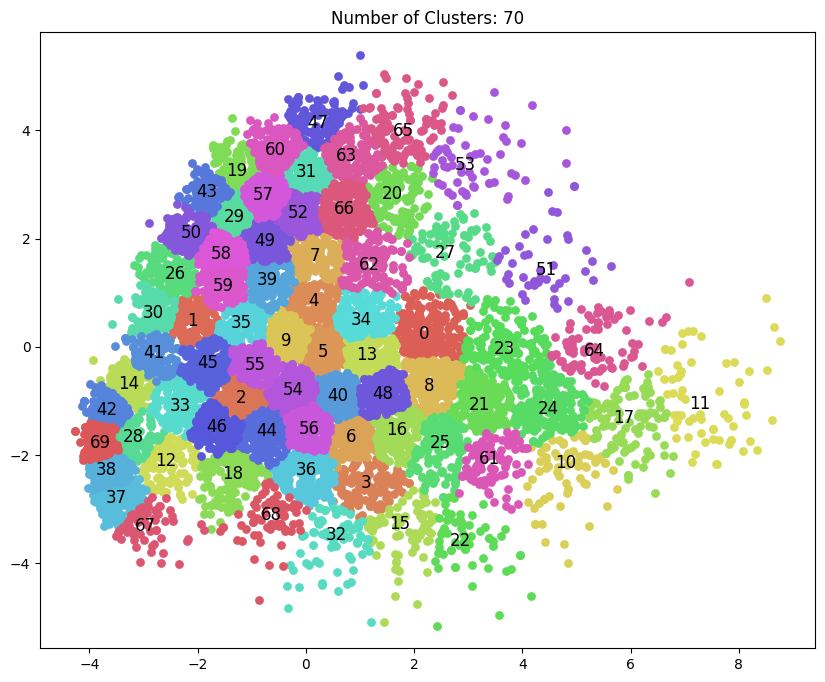

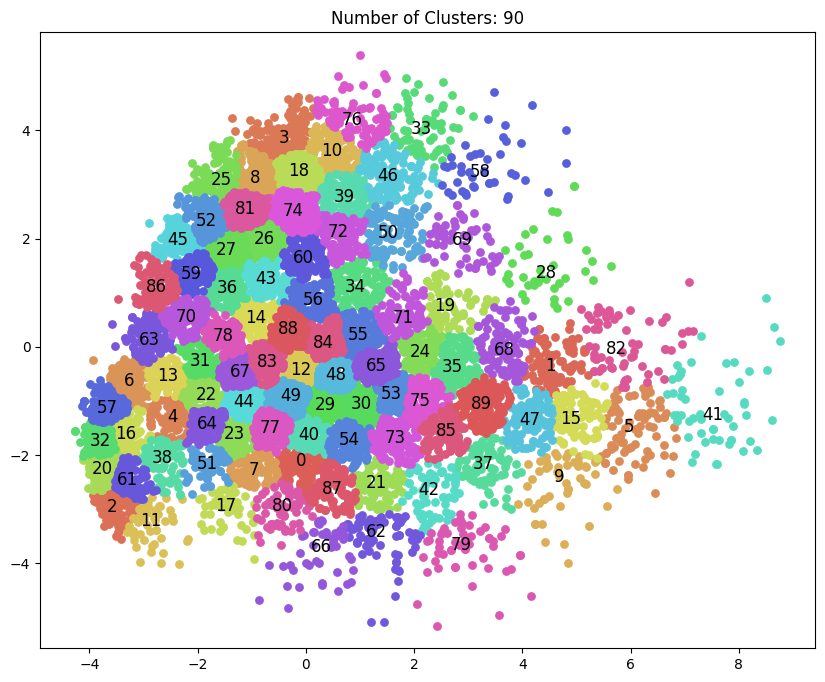

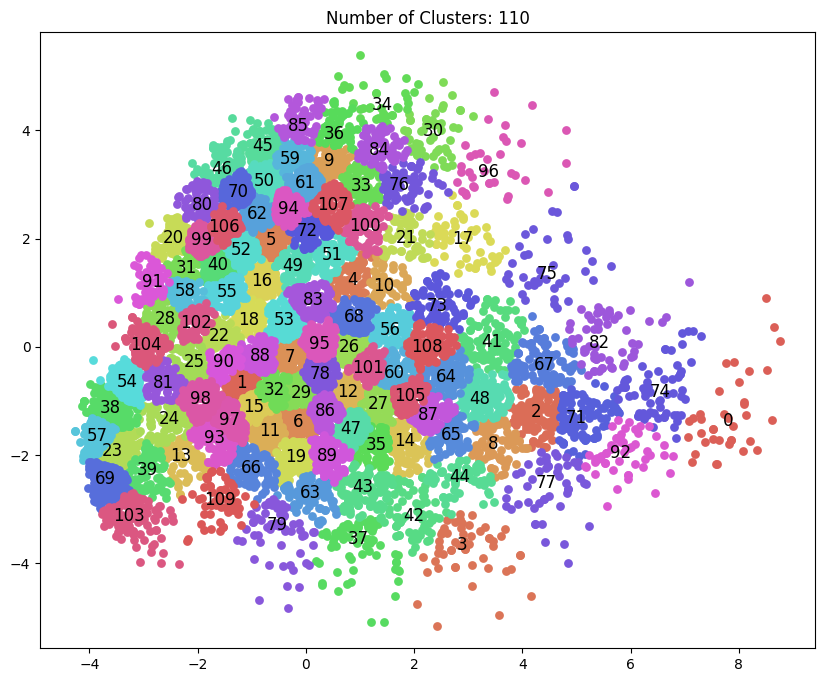

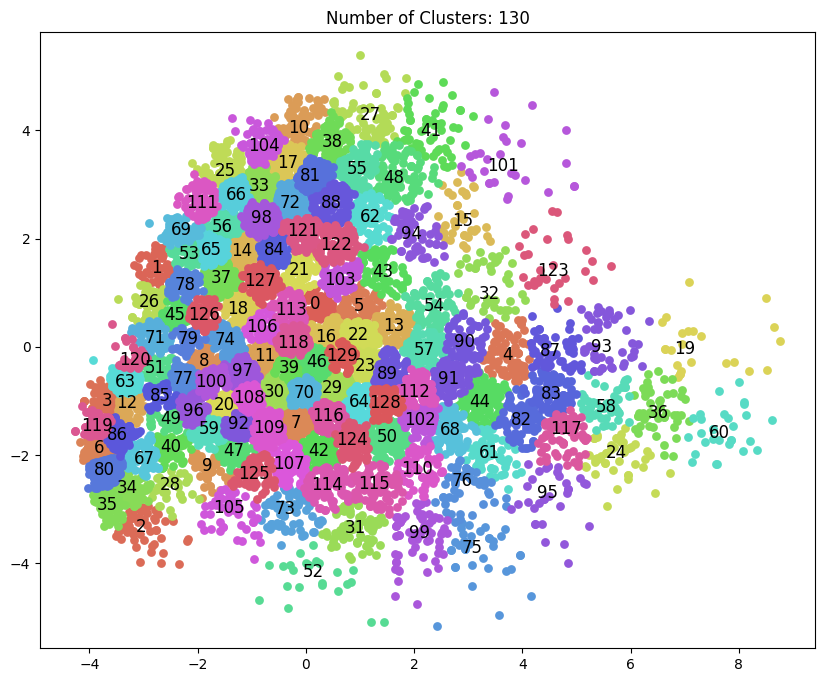

In [61]:
def compute_wcss(X, centers, labels):
    wcss = 0
    for k in range(len(centers)):
        cluster_points = X[labels == k, :]
        wcss += np.sum((cluster_points - centers[k])**2)
    return wcss

K_values = range(10, 131, 20)
wcss_values = []

for k in K_values:
    (centers, labels, it) = kmeans(y_sklearn, k)
    wcss = compute_wcss(y_sklearn, centers[-1], labels[-1])
    wcss_values.append(wcss)
    kmeans_display(y_sklearn, labels[-1])

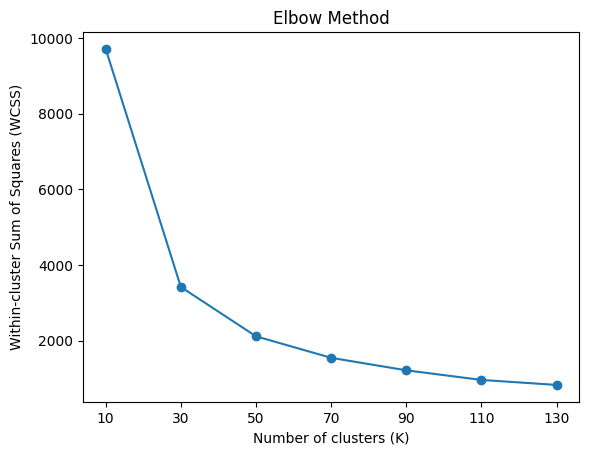

In [40]:
plt.plot(K_values, wcss_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(K_values)
plt.show()

#### 3D

In [25]:
# hien tai dang lam voi 1 anh do du lieu to 

# optimal_K = K_values[np.argmin(wcss_values)]

optimal_K = 10
(centers, labels, it) = kmeans(y_sklearn_3D, optimal_K)

print('Centers found by our algorithm:')
print(centers[-1])

Centers found by our algorithm:
[[-3.07685375 -1.69742894 -0.06642661]
 [ 1.97210228 -1.0338434   2.46374059]
 [-0.41823781  2.22729301  1.81804657]
 [ 5.26833582 -1.12277472  1.36882794]
 [-1.6601764   1.58589649 -0.74168873]
 [ 0.6272893  -1.14213753 -0.26353782]
 [ 0.22887588 -1.05972004 -2.92492366]
 [ 3.39130616 -0.73119009 -1.92075288]
 [-0.97214174 -0.87506145  1.72986054]
 [ 0.74710757  3.03399086 -0.77899349]]


In [26]:
from sklearn.metrics import adjusted_rand_score

score_3d = adjusted_rand_score(Y, labels[-1])
score_3d

0.22951814827220368

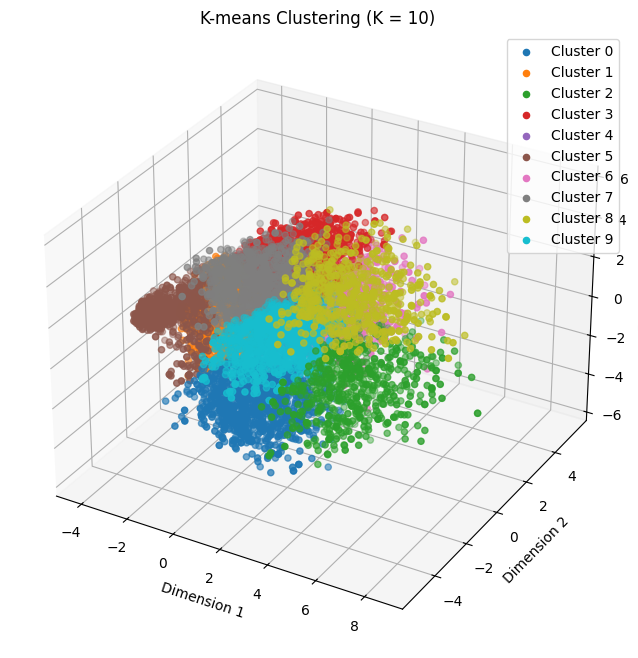

In [23]:
# hien tai dang lam voi 1 anh do du lieu to 

# optimal_K = K_values[np.argmin(wcss_values)]

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

for k in range(optimal_K):
    cluster_points = y_sklearn_3D[labels[-1] == k]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {k}')
    

# for k in range(optimal_K):
#     centroid_x = centers[-1][k, 0]
#     centroid_y = centers[-1][k, 1]
#     centroid_z = centers[-1][k, 2]
#     ax.text(centroid_x, centroid_y, centroid_z, f'Cluster {k}', fontsize=12, color='black', ha='center', va='center')


# ax.scatter(centers[-1][:, 0], centers[-1][:, 1], centers[-1][:, 2], color='red', marker='x', s=200, label='Centroids')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title(f'K-means Clustering (K = {optimal_K})')
ax.legend()
plt.show()

In [1]:
# import plotly.graph_objs as go

# Scene = dict(xaxis = dict(title  = 'Principal Component 1 -->'),yaxis = dict(title  = 'Principal Component 2--->'),zaxis = dict(title  = 'Principal Component 3-->'))

# # colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
# #           'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
# #           'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# labels = Y
# for k in range(optimal_K):
#     cluster_points = y_sklearn_3D[labels[-1] == k]
#     trace = go.Scatter3d(x=cluster_points[:, 0], y=cluster_points[:, 1],z=cluster_points[:, 2],mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
    
# # trace = go.Scatter3d(x=cluster_points[:, 0], y=cluster_points[:, 1], z=cluster_points[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
# layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
# data = [trace]
# fig = go.Figure(data = data, layout = layout)
# fig.show()

In [43]:
# need to revalue center and poinst
(centers, labels, it) = kmeans(y_sklearn_3D, 10)

# color list
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
          'rgb(188, 189, 34)', 'rgb(23, 190, 207)']


Scene = dict(xaxis=dict(title='Principal Component 1 -->'),
             yaxis=dict(title='Principal Component 2 --->'),
             zaxis=dict(title='Principal Component 3 -->'))


data = []
for k in range(optimal_K):
    cluster_points = y_sklearn_3D[labels[-1] == k]
    trace = go.Scatter3d(x=cluster_points[:, 0],
                         y=cluster_points[:, 1],
                         z=cluster_points[:, 2],
                         mode='markers',
                         marker=dict(color=colors[k], size=5, line=dict(color='black', width=0.5)),
                         name=f'Cluster {k}')
    data.append(trace)

# Add centroids
centroid_trace = go.Scatter3d(x=centers[-1][:, 0],
                              y=centers[-1][:, 1],
                              z=centers[-1][:, 2],
                              mode='markers',
                              marker=dict(color='red', size=10, symbol='x'),
                              name='Centroids')
data.append(centroid_trace)

layout = go.Layout(margin=dict(l=0, r=0),
                   scene=Scene,
                   height=800,
                   width=800,
                   legend=dict(orientation='h', x=0.1, y=1.1),
                   annotations=[dict(text='Legend:', showarrow=False, x=0, y=1.1)])


fig = go.Figure(data=data, layout=layout)
fig.show()

# 4) Xây dựng chương trình sử dụng mô hình CNN để phân loại các hình ảnh. Kiến trúc cụ thể như sau: Mạng gồm ít nhất 03 tầng tích chập hỗn hợp Convolution + Activation ReLU + Max Pooling, 02 tầng fully connected với số units phù hợp và tầng quyết định cuối cùng sử dụng softmax. Huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.

In [44]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(64, activation='relu'),
# Only 1 output neuron.
# It will contain a value from 0-1 where 0 for 1 class ('cats')
# and 1 for the other ('dogs')
tf.keras.layers.Dense(10, activation='softmax'),
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [47]:
len(train_images)

60000

In [49]:
from tensorflow.keras.utils import to_categorical
# Load and preprocess the data
# train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
train_img = train_images / 255.0
test_img = test_images / 255.0

# Reshape the data to fit the CNN input shape
train_img = train_img.reshape((len(train_images), 28, 28, 1))
test_img = test_img.reshape((len(test_images), 28, 28, 1))

# Convert labels to one-hot encoding
train_lab = tf.keras.utils.to_categorical(train_labels)
test_lab = tf.keras.utils.to_categorical(test_labels)
# test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

# # (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_img = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# test_img = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# train_lab = to_categorical(train_labels)
# test_lab = to_categorical(test_labels)

In [50]:
# from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
# Train the model
model.fit(train_img, train_lab, epochs=50, batch_size=64)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_img, test_lab)
print('Test accuracy:', test_acc)

Epoch 1/50
938/938 [==============================] - 19s 8ms/step - loss: 0.2757 - accuracy: 0.9135
Epoch 2/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0807 - accuracy: 0.9756
Epoch 3/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0548 - accuracy: 0.9829
Epoch 4/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0411 - accuracy: 0.9876
Epoch 5/50
938/938 [==============================] - 8s 9ms/step - loss: 0.0313 - accuracy: 0.9901
Epoch 6/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 7/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 8/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 9/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0134 - accuracy: 0.9954
Epoch 10/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0128 - accuracy: 0.995

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalize the image data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to fit the CNN input shape
train_images = train_images.reshape((num_train_images, 28, 28, 1))
test_images = test_images.reshape((num_test_images, 28, 28, 1))

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Perform PCA dimensionality reduction
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images.reshape(num_train_images, -1))
test_images_pca = pca.transform(test_images.reshape(num_test_images, -1))

# Reshape the data back to the original dimensions
train_images_pca = train_images_pca.reshape((num_train_images, 2))
test_images_pca = test_images_pca.reshape((num_test_images, 2))

# Create the CNN model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(2,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images_pca, train_labels, epochs=5, batch_size=64)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images_pca, test_labels)
print('Test accuracy:', test_acc)


In [ ]:
train_images,train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)

X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2)
y_sklearn = pca.fit_transform(X_norm)

# 5) SVM

## linear

In [5]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as matplot
%matplotlib inline

import random
matplot.rcdefaults()
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC

LinearSVC default parameters: penalty='l2', loss='squared_hinge', tol=0.0001, C=1.0, multi_class='ovr', f max_iter=1000

In [19]:
svm_linear = LinearSVC(dual=False)
svm_linear.fit(train_images, train_labels)

LinearSVC(dual=False)

In [20]:
svm_linear.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
svm_linear.intercept_

array([-0.47556648, -0.0079526 , -0.72931439, -1.19888999, -0.21412261,
        0.01441548, -0.79231643, -0.1222897 , -2.17871012, -1.14945395])

In [22]:
pred = svm_linear.predict(test_images)
pred

array([6, 4, 6, ..., 4, 8, 6], dtype=int64)

In [24]:
accuracy_score(test_labels, pred) # Accuracy

0.9135

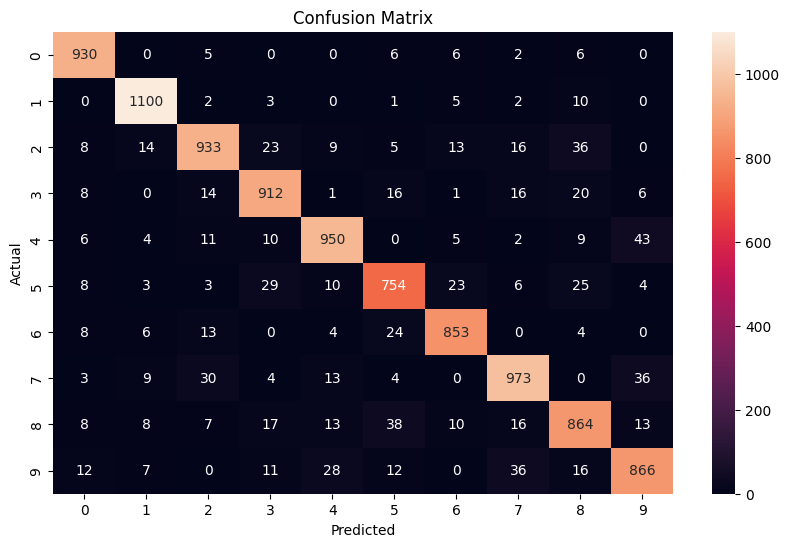

In [25]:
cm = confusion_matrix(test_labels, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

find optimal c for linear SVM

In [26]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(train_images, train_labels)
    coef = svm.coef_
    
    p_tr = svm.predict(train)
    a_tr = accuracy_score(trlab, p_tr)
    
    pred = svm.predict(test_images)
    a = accuracy_score(test_labels, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

In [ ]:
SVC(kernel = 'linear', C = 100) #

C:\Users\Admin\AppData\Local\Temp\ipykernel_26288\3889785566.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing")


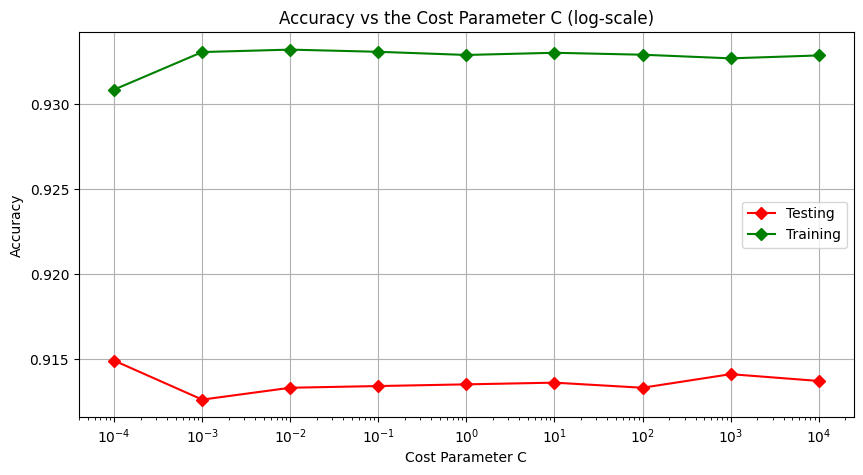

In [27]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing")
matplot.semilogx(c, acc_tr,'-gD' , label="Training")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy vs the Cost Parameter C (log-scale)')
matplot.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_26288\1997507378.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing")


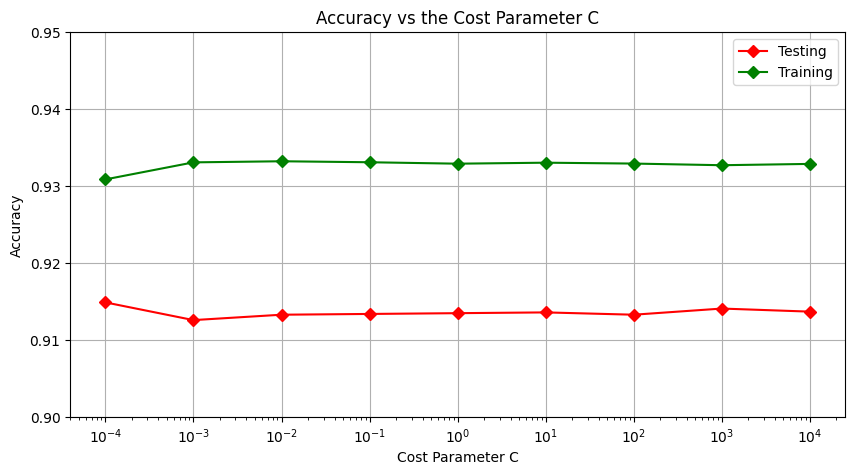

In [32]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing")
matplot.semilogx(c, acc_tr,'-gD' , label="Training")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy vs the Cost Parameter C')
matplot.ylim(0.9, 0.95)
matplot.show()

In [29]:
svm_coef = coefficient[0]
svm_coef.shape

(10, 784)

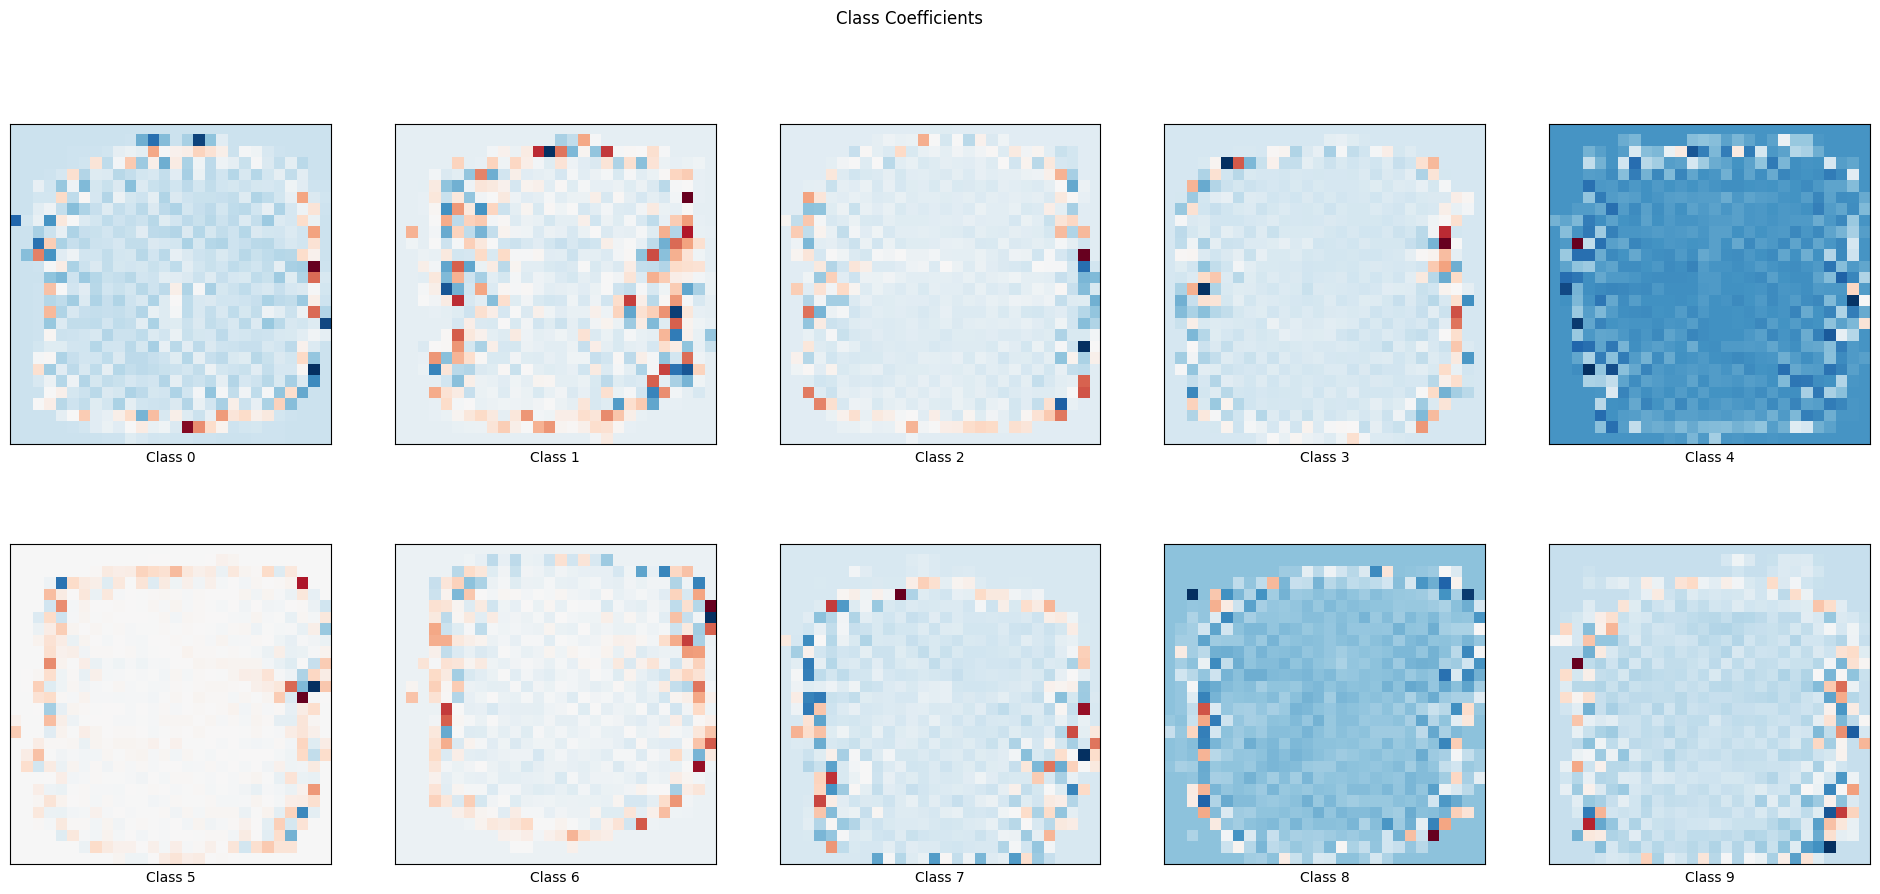

In [30]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

It reflects my views on Linear SVC with L2 (default) penalty, these images look very vaguely like the original images, also different than we saw in Logistic regression or Naive Bayes. In Naive Bayes, the underlying number was clearly visible, while in Logistice regression the pattern seemed quite distinct between all the classes. However, here you dont see any apparant patterns or distinctness and hard to differentiate between classes. However, we can also interpret some numbers like 0,5,6,8

Another important observation is, the images are also different looking than its L2 siblings as well, not by a bigger margin, but still different none the less.

## SVC RBF kernel

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcdefaults()
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [139]:
#generating a random sequence for sampling
seq = np.random.randint(0,60000,6000)
train_samp = train_images[seq]
trlab_samp = train_labels[seq]

train_samp.shape
trlab_samp.shape

(6000,)

In [6]:
seq = np.random.randint(0,10000,1000)
test_samp = test_images[seq]
tslab_samp = test_labels[seq]

test_samp.shape
tslab_samp.shape

(1000,)

In [142]:
len(train_labels)

60000

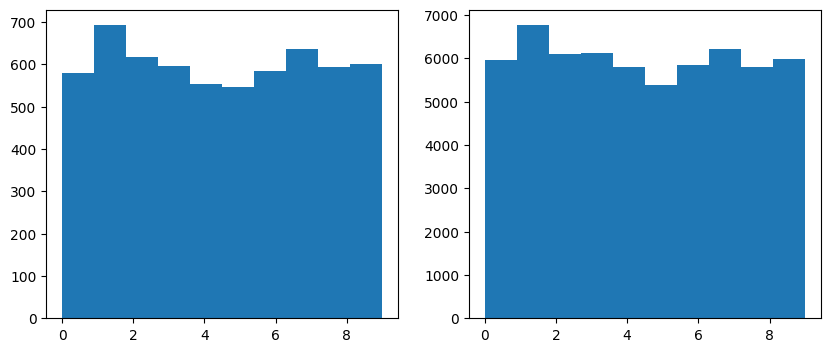

In [140]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(trlab_samp)
ax[1].hist(train_labels)
fig.show
plt.show()

### Running SVC for multiple cost factor(s) C and Gamma

In [12]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='rbf')

# Perform grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1e-6, 1e-5, 1e-4, 1e-3,1e-2]
}
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
grid_search.fit(train_samp, trlab_samp)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             return_train_score=True, verbose=2)

In [13]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      127.513564      1.368133        15.028318        0.278219    0.01   
1      129.022218      2.150666        15.414145        0.488474    0.01   
2      132.037659      1.345719        15.958060        0.694730    0.01   
3      129.496860      5.267453        16.610728        0.776766    0.01   
4      126.340954      2.392353        15.863999        0.486412    0.01   
5      113.591600      3.186132        15.738696        1.466199     0.1   
6      120.900735      4.829582        17.287477        1.477555     0.1   
7      125.554050      6.840082        17.418103        0.721456     0.1   
8      131.105021      1.572064        15.918886        0.484492     0.1   
9      124.122663      7.016642        18.018336        2.250867     0.1   
10      96.052279      1.667423        13.599496        0.988164       1   
11     114.739510      1.947764        16.124362        1.147124       1   
12     117.657823      5.501275        16.603935        0.536071       1   
13     114.121986      4.271775        19.259172        1.100844       1   
14     115.238293      3.090377        16.151104        1.134738       1   
15      90.660446      3.983937        11.916644        0.418834      10   
16     107.917886      6.062426        16.583163        1.035306      10   
17     114.090588      3.690114        14.881753        0.839617      10   
18     116.021800      5.349605        14.693316        0.234464      10   
19     111.619092      4.267987        17.856547        1.195763      10   
20      93.131511      2.722739        13.206850        0.493773     100   
21     108.809751      5.106720        14.492338        0.623344     100   
22     106.483124      6.219847        14.439890        0.995924     100   
23     104.824754      2.615358        13.111949        0.325679     100   
24      97.472400      3.762428        11.312480        0.762895     100   

   param_gamma                        params  split0_test_score  \
0     0.000001   {'C': 0.01, 'gamma': 1e-06}           0.156667   
1      0.00001   {'C': 0.01, 'gamma': 1e-05}           0.110833   
2       0.0001  {'C': 0.01, 'gamma': 0.0001}           0.110833   
3        0.001   {'C': 0.01, 'gamma': 0.001}           0.110833   
4         0.01    {'C': 0.01, 'gamma': 0.01}           0.110833   
5     0.000001    {'C': 0.1, 'gamma': 1e-06}           0.616667   
6      0.00001    {'C': 0.1, 'gamma': 1e-05}           0.110833   
7       0.0001   {'C': 0.1, 'gamma': 0.0001}           0.110833   
8        0.001    {'C': 0.1, 'gamma': 0.001}           0.110833   
9         0.01     {'C': 0.1, 'gamma': 0.01}           0.110833   
10    0.000001      {'C': 1, 'gamma': 1e-06}           0.945833   
11     0.00001      {'C': 1, 'gamma': 1e-05}           0.275833   
12      0.0001     {'C': 1, 'gamma': 0.0001}           0.222500   
13       0.001      {'C': 1, 'gamma': 0.001}           0.222500   
14        0.01       {'C': 1, 'gamma': 0.01}           0.222500   
15    0.000001     {'C': 10, 'gamma': 1e-06}           0.947500   
16     0.00001     {'C': 10, 'gamma': 1e-05}           0.276667   
17      0.0001    {'C': 10, 'gamma': 0.0001}           0.222500   
18       0.001     {'C': 10, 'gamma': 0.001}           0.222500   
19        0.01      {'C': 10, 'gamma': 0.01}           0.222500   
20    0.000001    {'C': 100, 'gamma': 1e-06}           0.947500   
21     0.00001    {'C': 100, 'gamma': 1e-05}           0.276667   
22      0.0001   {'C': 100, 'gamma': 0.0001}           0.222500   
23       0.001    {'C': 100, 'gamma': 0.001}           0.222500   
24        0.01     {'C': 100, 'gamma': 0.01}           0.222500   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.160833           0.151667  ...         0.157500   
1            0.110833           0.110833  ...         0.111167   
2            0.110833           0.110833  ...         0.111167   
3            0.11083

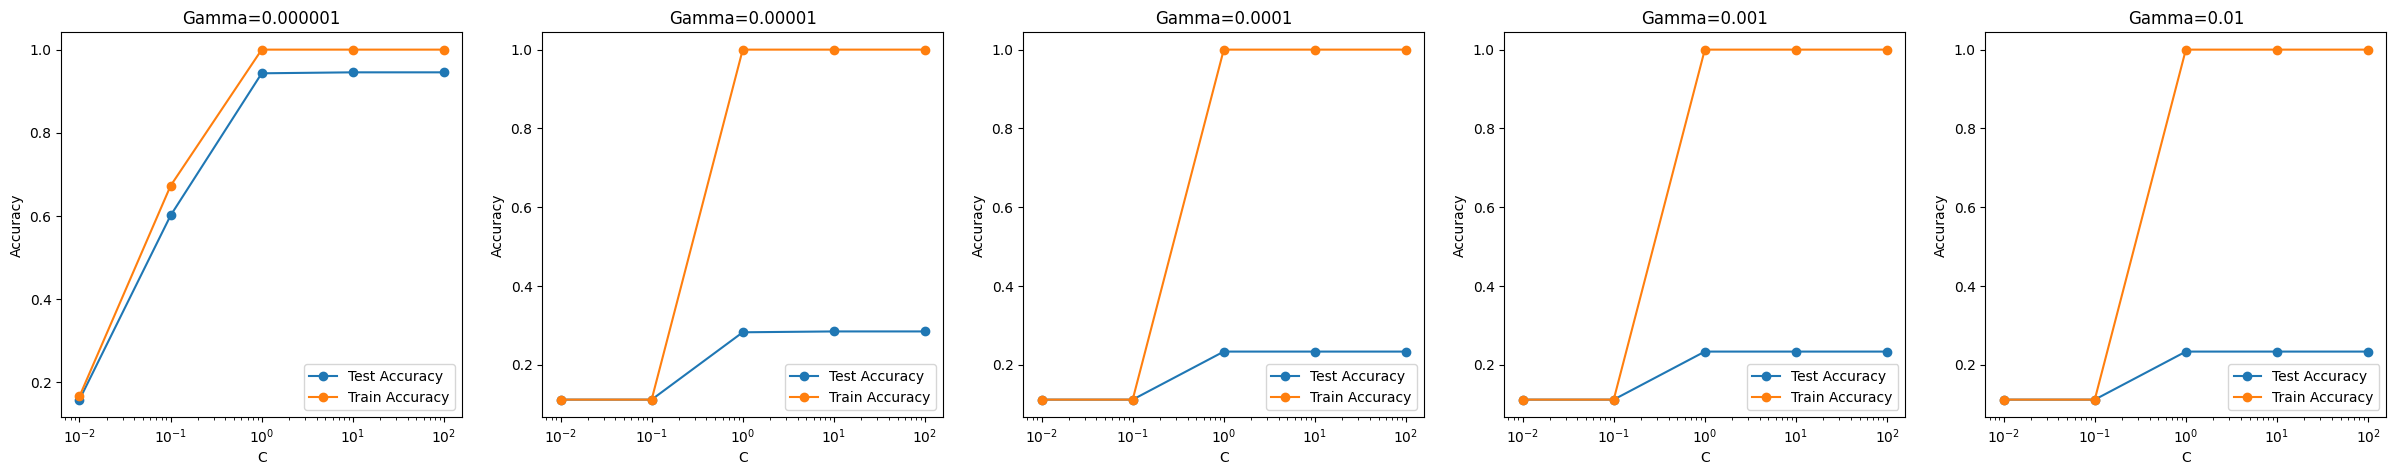

In [25]:
plt.figure(figsize=(30, 5))

# Subplot 1/4: Gamma = 0.000001
plt.subplot(151)
gamma_000001 = cv_results[cv_results['param_gamma'] == 1e-6]
plt.plot(gamma_000001["param_C"], gamma_000001["mean_test_score"], marker='o')
plt.plot(gamma_000001["param_C"], gamma_000001["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.000001")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')

# Subplot 2/4: Gamma = 0.00001
plt.subplot(152)
gamma_00001 = cv_results[cv_results['param_gamma'] == 1e-5]
plt.plot(gamma_00001["param_C"], gamma_00001["mean_test_score"], marker='o')
plt.plot(gamma_00001["param_C"], gamma_00001["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')

# Subplot 3/4: Gamma = 0.0001
plt.subplot(153)
gamma_0001 = cv_results[cv_results['param_gamma'] == 1e-4]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"], marker='o')
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')

# Subplot 4/4: Gamma = 0.001
plt.subplot(154)
gamma_001 = cv_results[cv_results['param_gamma'] == 1e-3]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"], marker='o')
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(155)
gamma_01 = cv_results[cv_results['param_gamma'] == 1e-2]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"], marker='o')
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')


plt.show()


In [14]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'gamma': 1e-06}


In [48]:
# Evaluate the model on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(test_samp)

print(f"Accuracy: {accuracy_score(tslab_samp, y_pred)}")
print(classification_report(tslab_samp, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.99      0.97      0.98       115
           2       0.82      1.00      0.90       106
           3       0.97      0.97      0.97        87
           4       0.96      0.97      0.97       103
           5       1.00      0.96      0.98        90
           6       0.99      0.88      0.93        88
           7       0.96      0.91      0.93       121
           8       0.95      0.93      0.94       100
           9       0.95      0.95      0.95        95

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [23]:
sup_vec = grid_search.best_estimator_.support_
n_supp = grid_search.best_estimator_.n_support_

In [17]:
pd.DataFrame(n_supp)

0
0  462
1  186
2  531
3  490
4  531
5  498
6  443
7  393
8  539
9  520

In [18]:
pd.DataFrame(best_svm.dual_coef_)

0         1         2         3         4         5         6     \
0  0.050357  0.164379  0.017152  0.069642  0.042942  0.024020  0.229196   
1  0.291202  0.643507  0.064715  0.274609  0.230523  0.088393  0.917810   
2  0.220243  0.582192  0.054657  0.228581  0.219943  0.077050  0.787296   
3  0.217896  0.495725  0.052061  0.205658  0.057237  0.066189  0.712121   
4  0.273092  0.584769  0.051489  0.259758  0.120961  0.068308  0.766013   
5  0.281644  0.487802  0.048755  0.251058  0.067381  0.065506  0.723682   
6  0.148398  0.400756  0.041404  0.164856  0.074493  0.051679  0.573483   
7  0.311606  0.597369  0.060136  0.234808  0.137935  0.081275  0.831277   
8  0.185530  0.438738  0.047305  0.182544  0.095763  0.057135  0.615401   

       7         8         9     ...      4583      4584      4585      4586  \
0  0.094526  0.075684  0.038984  ... -0.350546 -0.000000 -0.443495 -0.677130   
1  0.296964  0.284392  0.160357  ... -0.107535 -0.000000 -0.173689 -0.207435   
2  0.304187  0.266934  0.138732  ... -0.393520 -0.000000 -0.496845 -0.748453   
3  0.253036  0.226691  0.120463  ... -0.362600 -0.000000 -0.515358 -0.699401   
4  0.406040  0.280630  0.138072  ... -0.387999 -0.000000 -0.400604 -0.877105   
5  0.325573  0.219592  0.156998  ... -0.327575 -0.000000 -0.927488 -0.709244   
6  0.188533  0.179422  0.093202  ... -0.303682 -0.000000 -0.386597 -0.601792   
7  0.290596  0.264324  0.157401  ... -0.407465 -0.616267 -0.551327 -0.470396   
8  0.207312  0.196116  0.100417  ... -0.375354 -0.000000 -0.910302 -0.749585   

       4587      4588      4589      4590      4591      4592  
0 -0.149056 -0.607878 -0.579907 -0.000000 -0.300978 -0.595767  
1 -0.084478 -0.179269 -0.175308 -0.000000 -0.106291 -0.229097  
2 -0.179808 -0.635665 -0.646821 -0.000000 -0.455507 -0.581227  
3 -0.142111 -0.743346 -0.573492 -0.000000 -0.377261 -0.679993  
4 -0.445069 -0.614189 -0.583718 -0.000000 -0.621106 -0.858201  
5 -0.137373 -0.917196 -0.619848 -0.000000 -0.425595 -0.678046  
6 -0.167725 -0.544476 -0.515831 -0.000000 -0.359117 -0.586264  
7 -0.201999 -0.367887 -0.538765 -0.054786 -0.373205 -0.428807  
8 -0.200360 -0.821117 -0.637155 -0.000000 -0.353947 -0.587761  

[9 rows x 4593 columns]

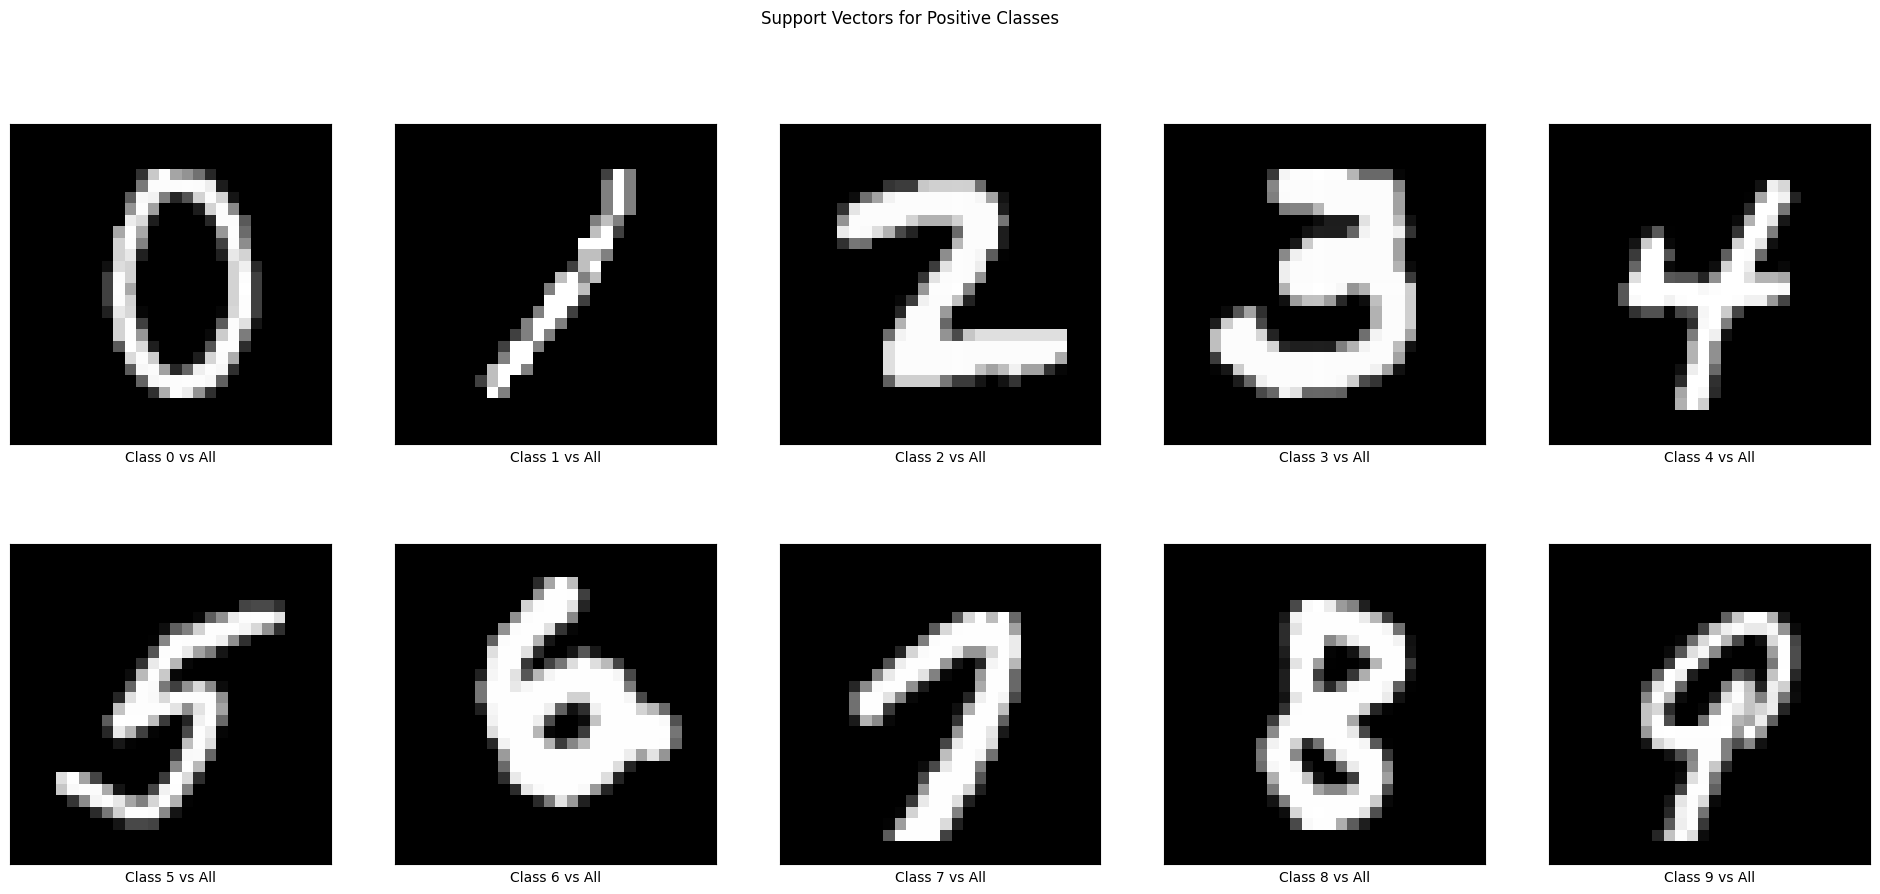

In [19]:
# Support Vectors for possitive Classes
ind = 0
plt.subplots(2, 5, figsize=(24, 10))
for i in range(len(n_supp)):
    l1 = plt.subplot(2, 5, i + 1)
    sv_image = train_samp[sup_vec[ind:ind + n_supp[i]]][0]
    l1.imshow(sv_image.reshape(28, 28), cmap='gray')
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[i]
plt.suptitle('Support Vectors for Positive Classes')
plt.show()


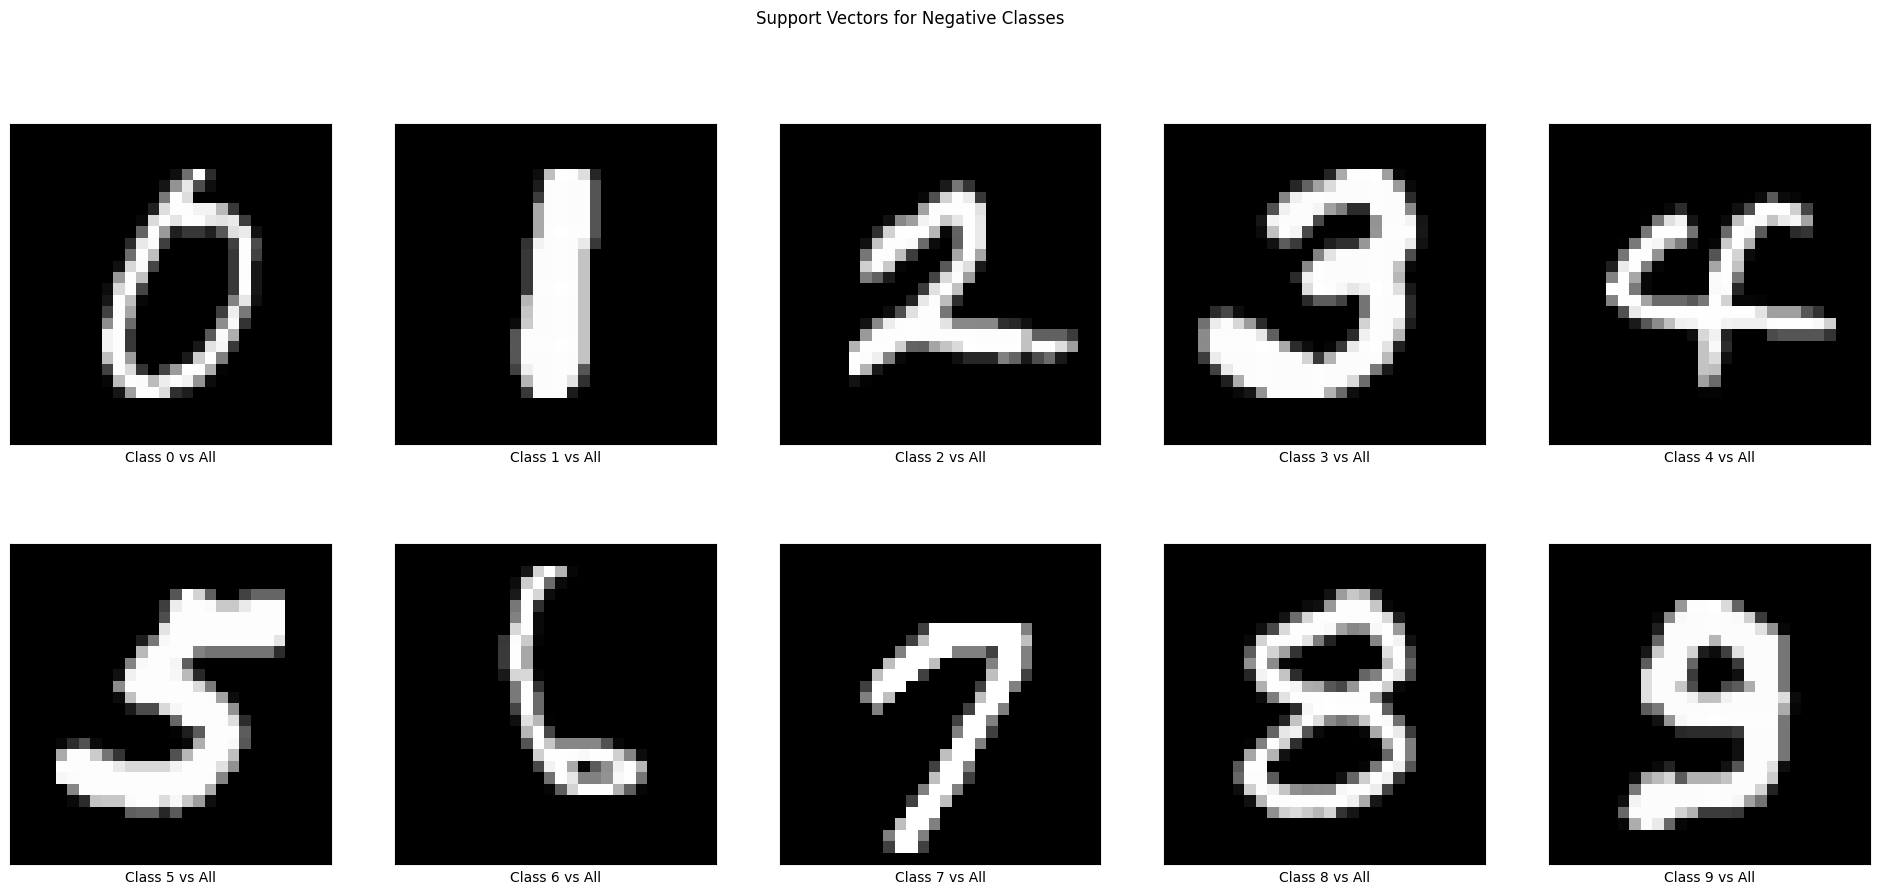

In [27]:
# Support Vectors for Negative Classes

plt.figure(figsize=(24, 10))
neg_ind = sum(n_supp)  # Start after all positive support vectors
for i in range(len(n_supp)):
    l1 = plt.subplot(2, 5, i + 1)
    neg_start = sum(n_supp[:i])  # Start index for negative support vectors for class i
    neg_end = neg_start + n_supp[i]
    if n_supp[i] > 0 and neg_start < len(sup_vec):
        sv_image = train_samp[sup_vec[neg_start:neg_end]][0]
        l1.imshow(sv_image.reshape(28, 28), cmap="gray")
        l1.set_xticks(())
        l1.set_yticks(())
        l1.set_xlabel('Class %i vs All' % i)
plt.suptitle('Support Vectors for Negative Classes')
plt.show()

Chúng ta có thể giải thích rõ ràng rằng các Support Vector ở lớp dương có thể phân biệt rõ ràng, trong khi các SV ở lớp âm cho thấy sự khác biệt rõ ràng so với lớp mà chúng thuộc<br>

Ví dụ: một SV âm loại 9 so với Tất cả trông không giống gì số 9 , điều này giúp phân loại lớp cụ thể đó như số 9 trong trường hợp này tốt hơn.

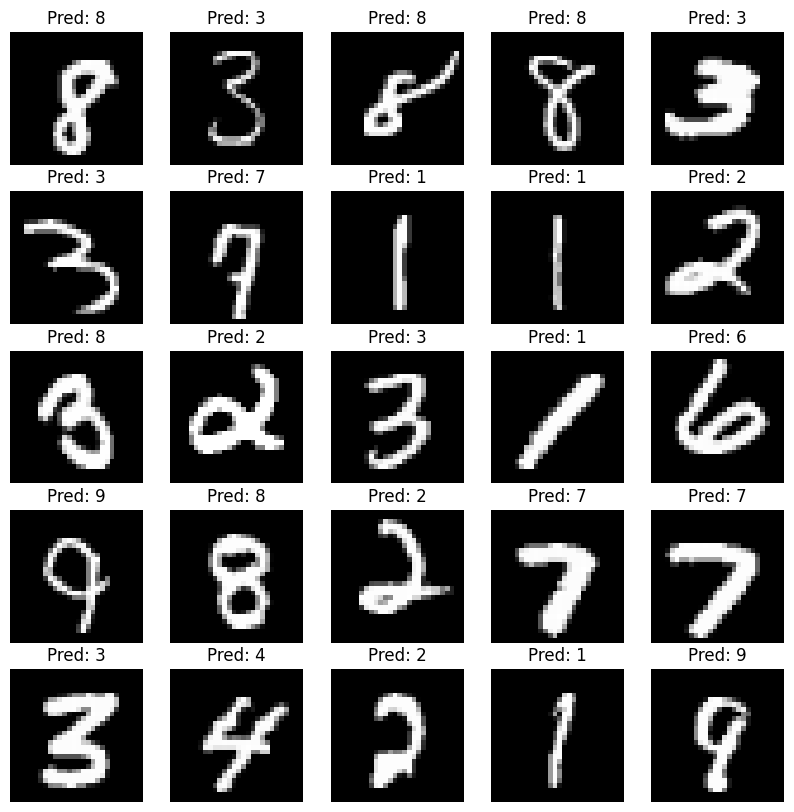

In [23]:
# Plot some of the test images with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_samp[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {int(y_pred[i])}")
    plt.axis('off')
plt.show()

## poly SVC

In [10]:
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import random
plt.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [30]:
#generating a random sequence for sampling
seq = np.random.randint(0,60000,6000)
train_samp = train_images[seq]
trlab_samp = train_labels[seq]

print(train_samp.shape)
print(trlab_samp.shape)

(6000, 784)
(6000,)


In [31]:
seq = np.random.randint(0,10000,1000)
test_samp = test_images[seq]
tslab_samp = test_labels[seq]

print(test_samp.shape)
print(tslab_samp.shape)

(1000, 784)
(1000,)


In [26]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='poly')

# Perform grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'degree': [2,3,4,5,6]
}
grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
grid_search.fit(train_samp, trlab_samp)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4, 5, 6]},
             return_train_score=True, verbose=2)

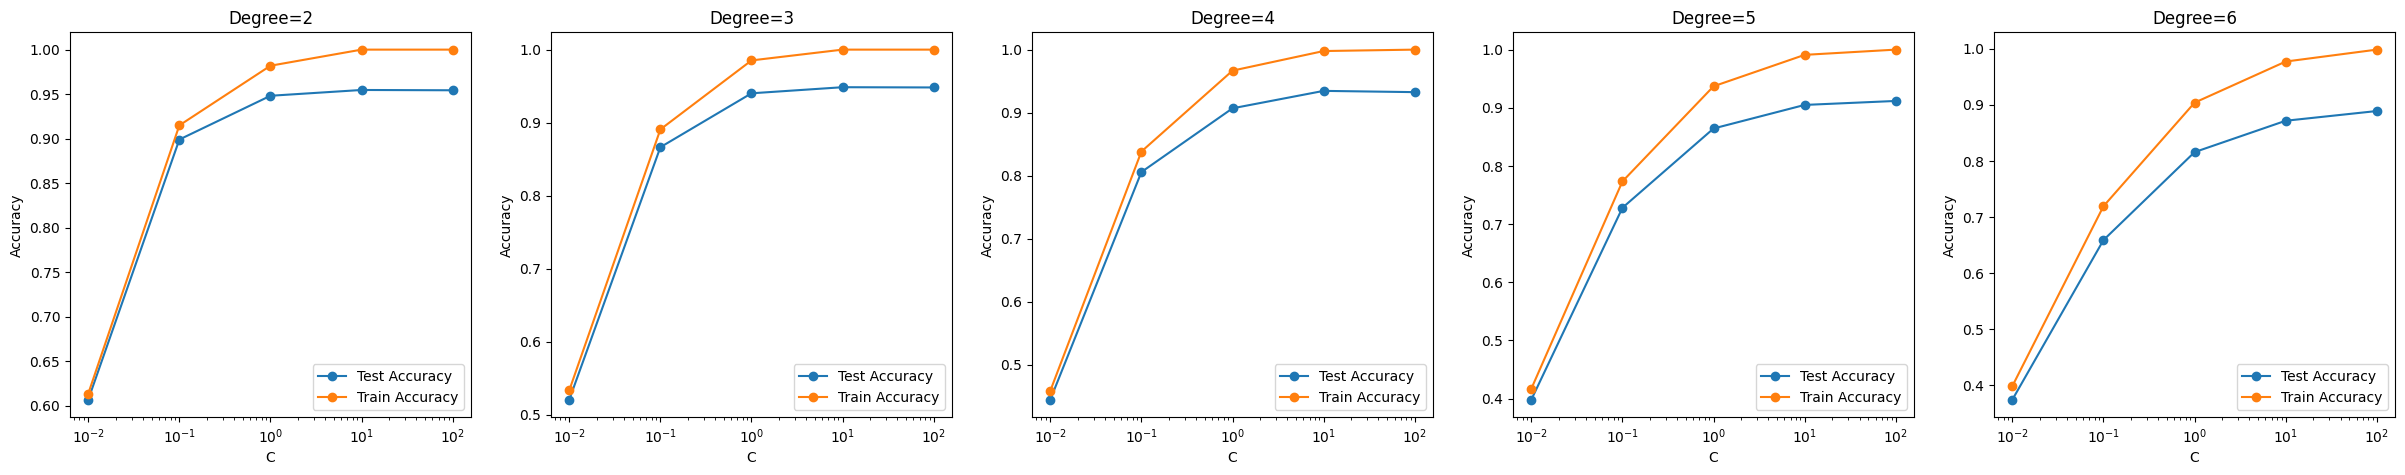

In [36]:
plt.figure(figsize=(30, 5))

# Subplot 1/4: Gamma = 0.000001
plt.subplot(151)
degree_2 = cv_results[cv_results['param_degree'] == 2]
plt.plot(degree_2["param_C"], degree_2["mean_test_score"], marker='o')
plt.plot(degree_2["param_C"], degree_2["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=2")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')

# Subplot 2/4: Gamma = 0.00001
plt.subplot(152)
degree_3 = cv_results[cv_results['param_degree'] == 3]
plt.plot(degree_3["param_C"], degree_3["mean_test_score"], marker='o')
plt.plot(degree_3["param_C"], degree_3["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=3")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')

# Subplot 3/4: Gamma = 0.0001
plt.subplot(153)
degree_4 = cv_results[cv_results['param_degree'] == 4]
plt.plot(degree_4["param_C"], degree_4["mean_test_score"], marker='o')
plt.plot(degree_4["param_C"], degree_4["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=4")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(154)
degree_5 = cv_results[cv_results['param_degree'] == 5]
plt.plot(degree_5["param_C"], degree_5["mean_test_score"], marker='o')
plt.plot(degree_5["param_C"], degree_5["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=5")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')


plt.subplot(155)
degree_6 = cv_results[cv_results['param_degree'] == 6]
plt.plot(degree_6["param_C"], degree_6["mean_test_score"], marker='o')
plt.plot(degree_6["param_C"], degree_6["mean_train_score"], marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Degree=6")

plt.legend(['Test Accuracy', 'Train Accuracy'], loc='lower right')
plt.xscale('log')


plt.show()


In [27]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'C': 10, 'degree': 2}


In [28]:
# Evaluate the model on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(test_samp)

print(f"Accuracy: {accuracy_score(tslab_samp, y_pred)}")
print(classification_report(tslab_samp, y_pred))

Accuracy: 0.939
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       0.97      1.00      0.98        98
           2       0.90      0.92      0.91       113
           3       0.92      0.90      0.91       115
           4       0.96      0.96      0.96       105
           5       0.93      0.94      0.93        83
           6       0.97      0.96      0.97        81
           7       0.94      0.86      0.90        94
           8       0.92      0.93      0.92        98
           9       0.95      0.94      0.94       108

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [35]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      108.815461      1.242847        14.639102        0.259021    0.01   
1      108.912881      2.270243        14.421167        0.795987    0.01   
2      106.786099      2.148265        13.383459        0.604546    0.01   
3      107.033115      1.736046        14.382436        1.296672    0.01   
4      107.173670      0.561884        13.623689        0.742598    0.01   
5       48.315064      0.868857         9.116779        0.410245     0.1   
6       54.847274      0.956995         9.026516        0.504301     0.1   
7       62.119159      2.426105         9.112046        0.652472     0.1   
8       69.473666      3.129861         9.615184        0.556719     0.1   
9       71.719252      4.427399        10.102561        0.100747     0.1   
10      23.801060      2.255014         5.838691        0.295844       1   
11      27.095965      1.062272         5.824902        0.391663       1   
12      33.596116      2.675044         5.836273        0.292813       1   
13      41.201670      1.915206         6.602568        1.020820       1   
14      44.787807      4.751675         6.410861        0.791213       1   
15      19.559724      0.698383         4.876694        0.413400      10   
16      21.884425      1.117644         5.012191        0.626853      10   
17      25.698201      2.480349         4.868533        0.261405      10   
18      26.948628      0.745906         4.930762        0.183995      10   
19      33.839640      0.763400         5.269625        0.195653      10   
20      18.880299      0.815026         5.096816        0.549282     100   
21      21.312464      1.169384         4.694219        0.247161     100   
22      22.889690      0.465993         4.247712        0.309546     100   
23      24.654958      0.612014         3.867524        0.104111     100   
24      26.777929      0.957585         3.501397        0.419033     100   

   param_degree                    params  split0_test_score  \
0             2  {'C': 0.01, 'degree': 2}           0.624167   
1             3  {'C': 0.01, 'degree': 3}           0.548333   
2             4  {'C': 0.01, 'degree': 4}           0.473333   
3             5  {'C': 0.01, 'degree': 5}           0.415000   
4             6  {'C': 0.01, 'degree': 6}           0.392500   
5             2   {'C': 0.1, 'degree': 2}           0.896667   
6             3   {'C': 0.1, 'degree': 3}           0.870833   
7             4   {'C': 0.1, 'degree': 4}           0.824167   
8             5   {'C': 0.1, 'degree': 5}           0.750833   
9             6   {'C': 0.1, 'degree': 6}           0.681667   
10            2     {'C': 1, 'degree': 2}           0.952500   
11            3     {'C': 1, 'degree': 3}           0.938333   
12            4     {'C': 1, 'degree': 4}           0.905000   
13            5     {'C': 1, 'degree': 5}           0.868333   
14            6     {'C': 1, 'degree': 6}           0.826667   
15            2    {'C': 10, 'degree': 2}           0.955833   
16            3    {'C': 10, 'degree': 3}           0.952500   
17            4    {'C': 10, 'degree': 4}           0.934167   
18            5    {'C': 10, 'degree': 5}           0.905833   
19            6    {'C': 10, 'degree': 6}           0.870833   
20            2   {'C': 100, 'degree': 2}           0.953333   
21            3   {'C': 100, 'degree': 3}           0.952500   
22            4   {'C': 100, 'degree': 4}           0.931667   
23            5   {'C': 100, 'degree': 5}           0.914167   
24            6   {'C': 100, 'degree': 6}           0.885833   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.610000           0.611667  ...         0.606833   
1            0.520000           0.506667  ...         0.520500   
2            0.437500           0.445833  ...         0.444333   
3            0.399167           0.395833  ...         0.398167   
4            0.376667           

In [34]:
sup_vec = grid_search.best_estimator_.support_
n_supp = grid_search.best_estimator_.n_support_

In [31]:
pd.DataFrame(best_svm.dual_coef_)

0         1         2         3         4         5         6     \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  1.281144  0.408270  0.000000  0.562323  0.000000   
2  0.000000  0.000000  0.290628  0.143350  0.000000  0.307981  0.000000   
3  0.000000  0.000000  0.000000  0.093946  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.212843  0.000000  0.000000  1.092161  0.000000   
5  0.266783  0.400827  0.924381  0.212735  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.340256  0.000000  0.267804   
7  0.000000  0.000000  1.597162  0.841757  0.000000  0.245791  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.620575   

       7         8         9     ...      1879      1880      1881      1882  \
0  0.000000  0.000000  0.000000  ... -0.914602 -0.000000 -0.000000 -0.000000   
1  0.214959  0.334866  0.358050  ... -0.993728 -0.000000 -0.000000 -0.000000   
2  0.000000  0.000000  0.126730  ... -1.497272 -0.000000 -0.000000 -0.786054   
3  0.000000  0.424012  0.000000  ... -2.406397 -0.000000 -1.449029 -4.270685   
4  0.000000  1.483860  0.000000  ... -0.713934 -0.000000 -0.703344 -0.000000   
5  0.000000  0.507809  0.000000  ... -2.464329 -0.000000 -0.000000 -1.498056   
6  0.000000  0.391631  0.000000  ... -1.250267 -0.000000 -0.000000 -0.000000   
7  0.000000  0.000000  1.365373  ... -0.798163 -0.000000 -1.028480 -0.000000   
8  0.000000  1.060145  0.000000  ... -2.353582 -1.385831 -0.000000 -5.822817   

       1883     1884      1885      1886      1887      1888  
0 -1.603362 -0.00000 -0.000000 -0.000000 -0.000000 -0.595851  
1 -1.484919 -0.00000 -0.000000 -0.000000 -0.000000 -0.000000  
2 -4.570970 -0.00000 -0.000000 -0.000000 -0.000000 -0.000000  
3 -1.321715 -0.00000 -0.849314 -0.000000 -0.534198 -0.443533  
4 -4.997027 -0.00000 -0.000000 -0.320339 -0.873637 -2.308220  
5 -1.791589 -0.00000 -3.003512 -0.000000 -0.000000 -1.291524  
6 -4.387927 -0.00000 -0.000000 -0.000000 -0.000000 -0.000000  
7 -5.410466 -0.93642 -1.235644 -0.000000 -0.263072 -0.000000  
8 -3.433477 -0.00000 -3.298672 -0.000000 -0.000000 -0.000000  

[9 rows x 1889 columns]

Mỗi vectơ hỗ trợ được xác định bởi SVC thuộc về một lớp nhất định (0 đến 9). Trong các hệ số kép, chúng được sắp xếp theo lớp mà chúng thuộc về. Các vectơ hỗ trợ được tổ chức theo hai biến này. Mỗi vectơ hỗ trợ được xác định rõ ràng bằng một lớp, điều hiển nhiên là nó có thể được ngụ ý trong nhiều nhất là n_classes-1 các bài toán một chọi một, tức là mọi so sánh với tất cả các lớp khác. Nhưng hoàn toàn có khả năng là một vectơ hỗ trợ nhất định sẽ không được bao hàm trong tất cả các bài toán một chọi một. SVC cũng cung cấp cho bạn trọng số của các vectơ hỗ trợ cho các lớp 0, 1, ..., 9 trong các bài toán một chọi một tương ứng của chúng. Việc so sánh với tất cả các lớp khác ngoại trừ lớp đó được thực hiện, dẫn đến n_classes - 1 tức là 9 cột. Thứ tự xảy ra theo thứ tự của các lớp duy nhất được trình bày ở trên. Có bao nhiêu hàng trong mỗi nhóm thì có bấy nhiêu vectơ hỗ trợ, tức là 2477.

In [33]:
pd.DataFrame(n_supp) # n_support_

0
0  107
1  126
2  200
3  189
4  212
5  244
6  161
7  177
8  228
9  245

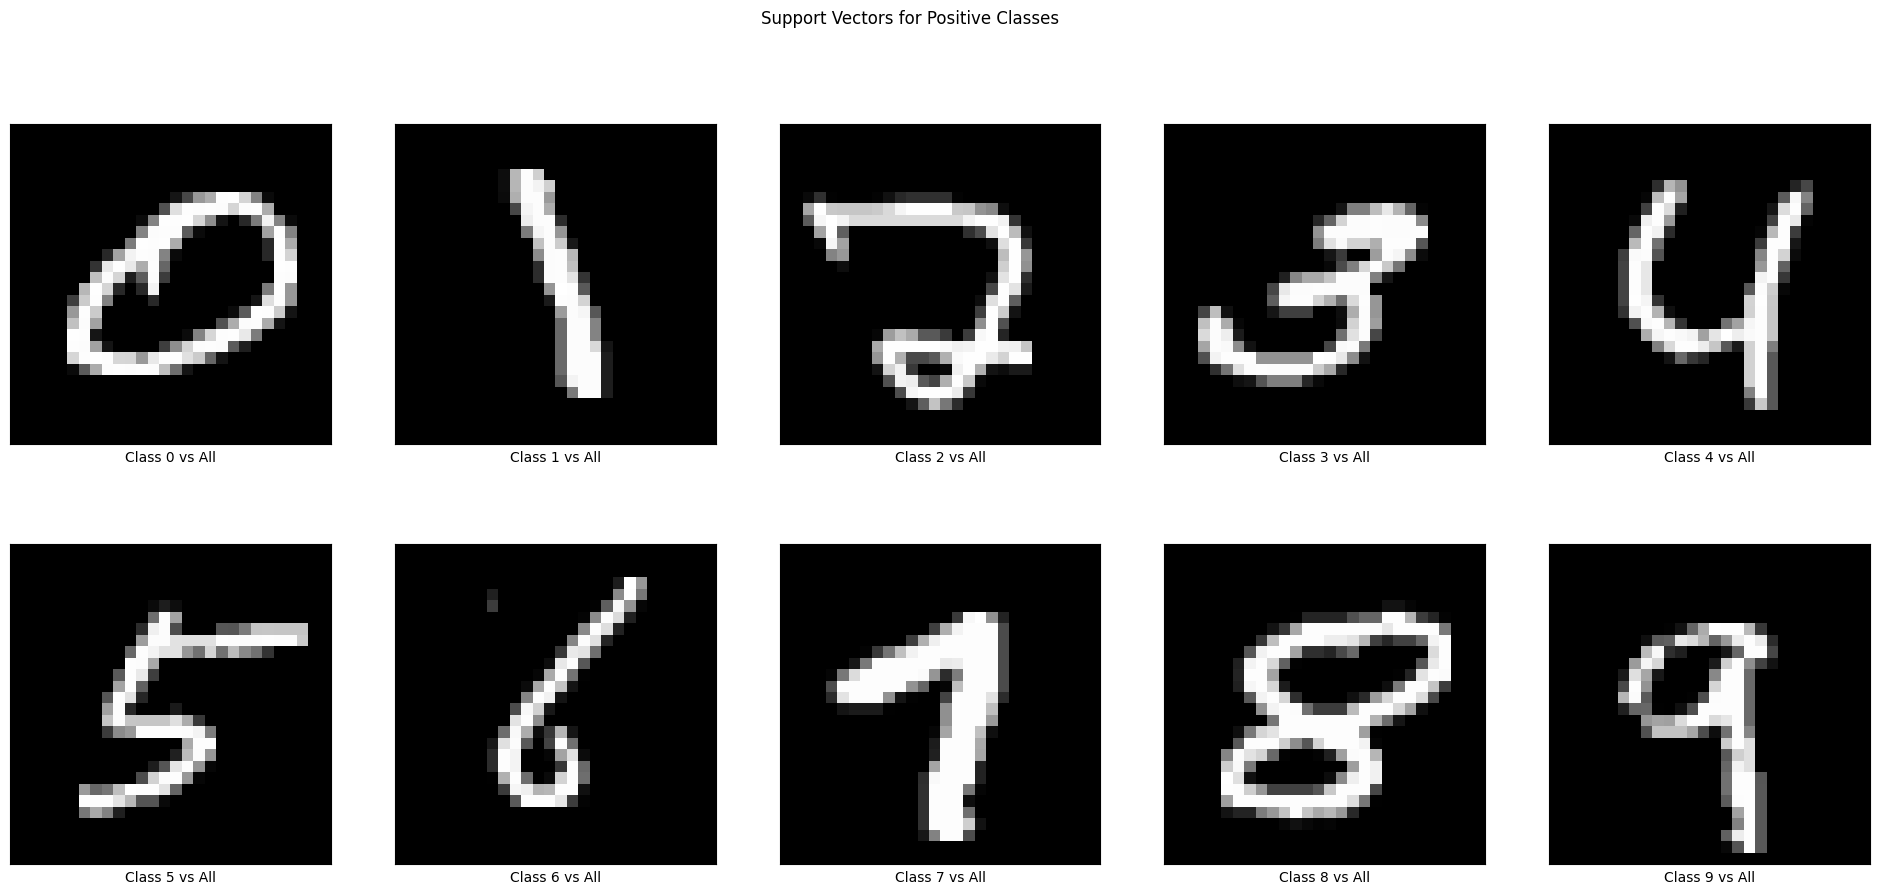

In [76]:
ind = 0
plt.figure(figsize=(24, 10))
for i in range(len(n_supp)):
    l1 = plt.subplot(2, 5, i + 1)
    if n_supp[i] > 0:
        sv_image = train_samp[sup_vec[ind:ind + n_supp[i]]][0]
        l1.imshow(sv_image.reshape(28, 28), cmap='gray')
        l1.set_xticks(())
        l1.set_yticks(())
        l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[i]
plt.suptitle('Support Vectors for Positive Classes')
plt.show()

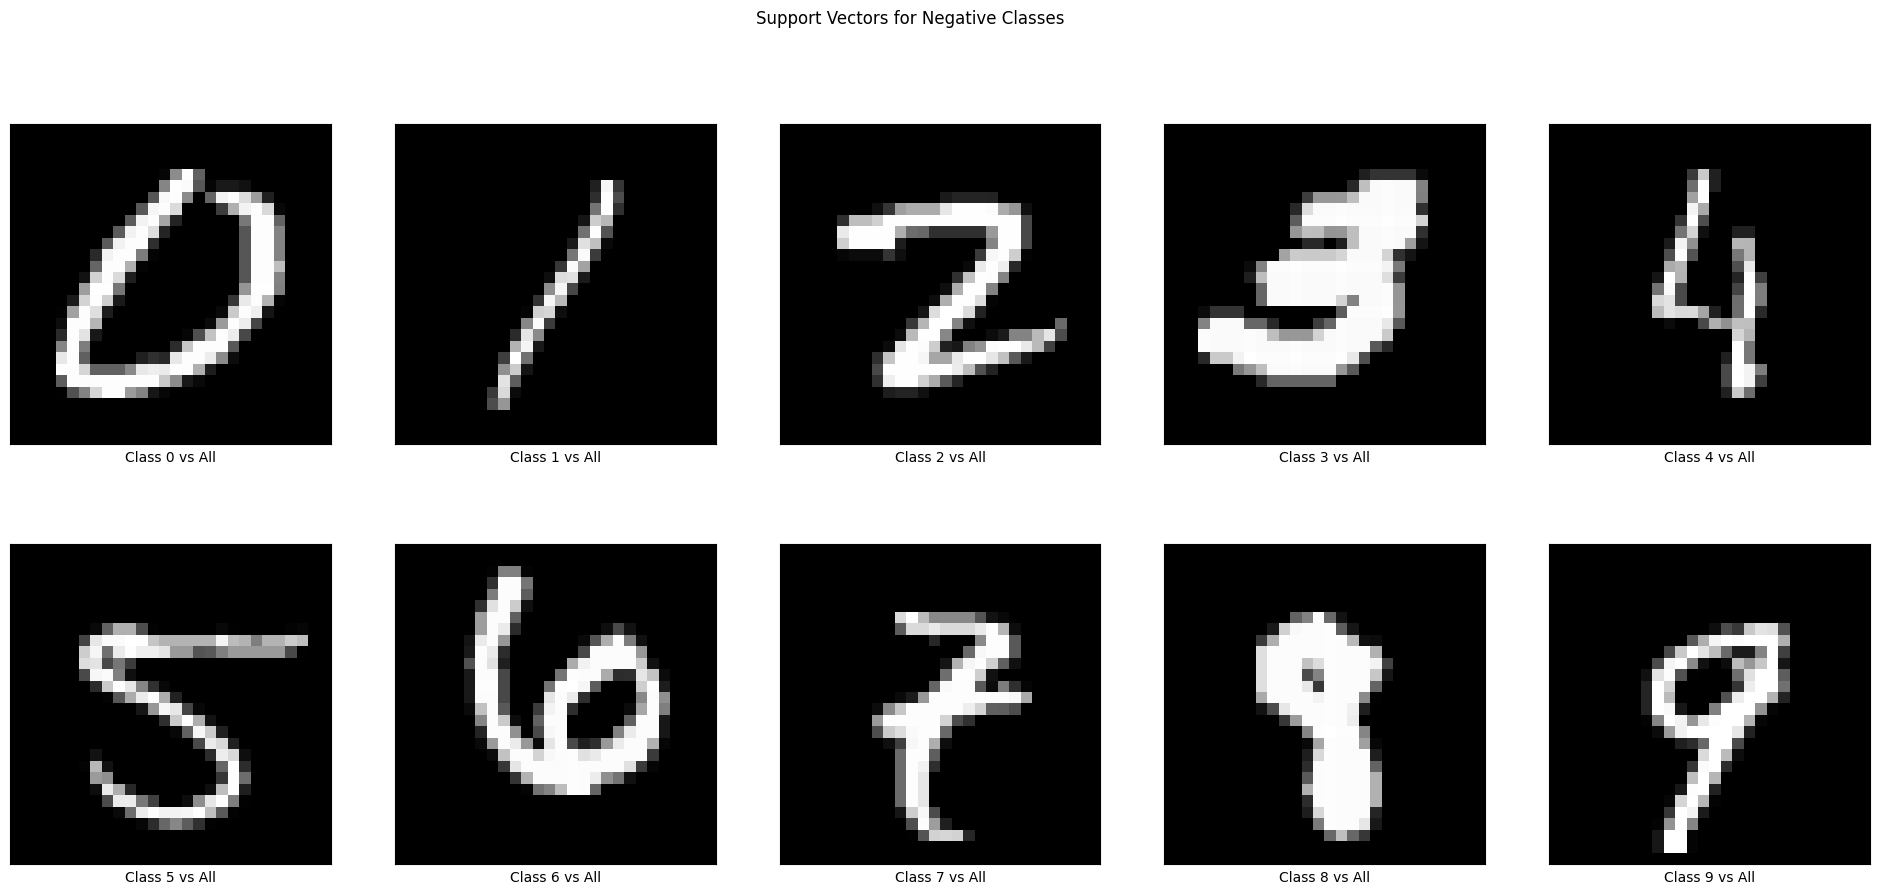

In [35]:
plt.figure(figsize=(24, 10))
neg_ind = sum(n_supp)  # Start after all positive support vectors
for i in range(len(n_supp)):
    l1 = plt.subplot(2, 5, i + 1)
    neg_start = sum(n_supp[:i])  # Start index for negative support vectors for class i
    neg_end = neg_start + n_supp[i]
    if n_supp[i] > 0 and neg_start < len(sup_vec):
        sv_image = train_samp[sup_vec[neg_start:neg_end]][0]
        l1.imshow(sv_image.reshape(28, 28), cmap="gray")
        l1.set_xticks(())
        l1.set_yticks(())
        l1.set_xlabel('Class %i vs All' % i)
plt.suptitle('Support Vectors for Negative Classes')
plt.show()

## Kết luận cho mô hình lựa chọn

Chọn rbf SVM 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix

# optimal hyperparameters
best_C = 10
best_gamma = 1e-06

In [135]:
0.000001 - 10**-6

0.0

In [6]:
# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(train_images, train_labels)

SVC(C=10, gamma=1e-06)

In [8]:
# make predictions
pred = svm_final.predict(test_images)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score, recall_score, classification_report

precision = precision_score(test_labels, pred, average='weighted')
recall = recall_score(test_labels, pred, average='weighted')



print(f"Accuracy score: {accuracy_score(test_labels, pred)}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")

print(classification_report(test_labels, pred))

Accuracy score: 0.9769
Precision Score: 0.98
Recall Score: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       963
           1       0.99      0.99      0.99      1136
           2       0.96      0.97      0.96      1014
           3       0.97      0.97      0.97      1020
           4       0.99      0.99      0.99       991
           5       0.98      0.98      0.98       953
           6       0.99      0.98      0.99       925
           7       0.97      0.97      0.97      1025
           8       0.95      0.98      0.96       958
           9       0.98      0.95      0.96      1015

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



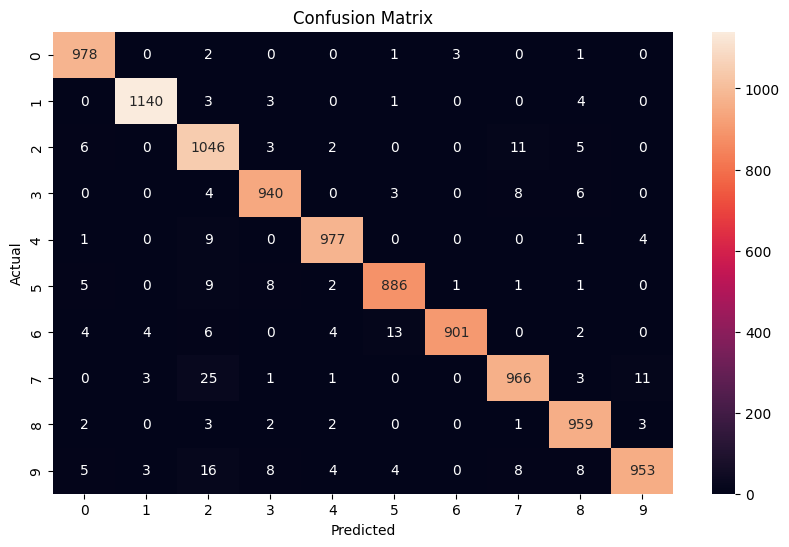

In [40]:
# confusion matrix
cm = confusion_matrix(test_labels, pred)


plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Gradient Descent

In [143]:
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape
    _, N = X.shape
    loss = 0
    dW = np.zeros_like(W)
    Z = W.T.dot(X)
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1)
    margins[y, np.arange(margins.shape[1])] = 0
    # Loss function
    loss = np.sum(margins, axis = (0, 1))
    loss /= N
    loss += 0.5 * reg * np.sum(W * W)
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    # Gradient
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

def multiclass_svm_GD(X, y, Winit, reg, lr=.1,batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        loss_history[it], dW = \
        svm_loss_vectorized(W, X_batch, y_batch, reg)
        W -= lr*dW
        if it % print_every == 1:
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it]))
    return W, loss_history


In [169]:
def multiclass_svm_GD(X, y, Winit, reg, lr=0.01, batch_size=100, num_iters=1000, print_every=100):
    W = Winit
    loss_history = np.zeros(num_iters)
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg)
        W -= lr * dW
        if it % print_every == 0 or it == num_iters - 1:
            print(f'Iteration {it}/{num_iters}, loss = {loss_history[it]:.4f}')
    return W, loss_history

In [174]:
N, d = train_images.shape
C = 10  
reg = 0.05
W = np.random.randn(784, C)

In [146]:
train_images = train_images.T  

In [175]:
print(len(W))
print(len(train_images))
print(len(train_labels))

784
784
60000


In [176]:
# Train the SVM model using mini-batch gradient descent
W, loss_history = multiclass_svm_GD(train_images, train_labels, W, reg)

Iteration 0/1000, loss = 13599.7003
Iteration 100/1000, loss = 1113.2592
Iteration 200/1000, loss = 1030.7285
Iteration 300/1000, loss = 850.7902
Iteration 400/1000, loss = 629.7643
Iteration 500/1000, loss = 351.8650
Iteration 600/1000, loss = 199.9533
Iteration 700/1000, loss = 370.3422
Iteration 800/1000, loss = 419.2461
Iteration 900/1000, loss = 410.6501
Iteration 999/1000, loss = 195.4107


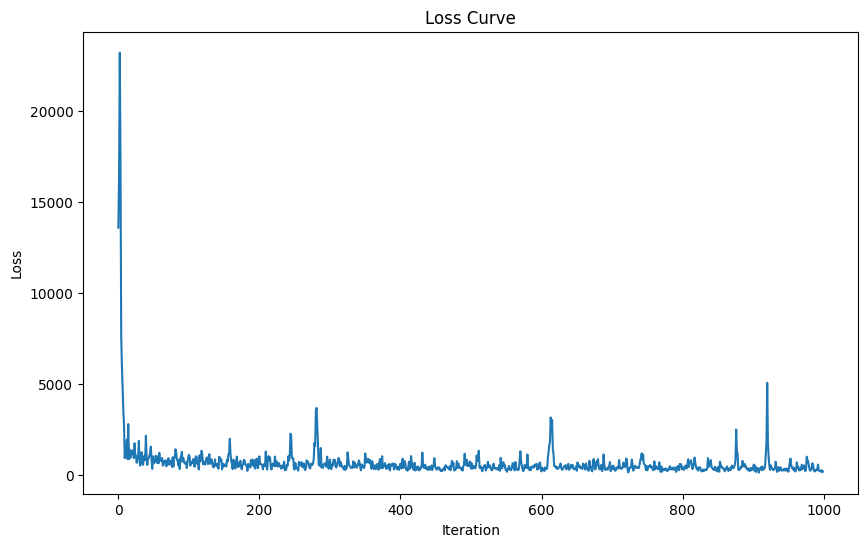

In [177]:

# Plot the loss as a function of iteration
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [178]:
# Predict and calculate accuracy
def predict(X, W):
    scores = W.T @ X.T
    return np.argmax(scores, axis=0)

test_preds = predict(test_images, W)
accuracy = np.mean(test_preds == test_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 86.66%
